# Libraries

In [11]:
# libraries
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import random
import pandas as pd
# import h5py

# import wave
# from scipy.io import wavfile

# import pyprep
# from pyprep.prep_pipeline import PrepPipeline


# # for permutation stats visualization
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from mne.viz import plot_compare_evokeds
import scipy

# for save and load dict variables
import pickle

# General parameters

In [292]:
####################
#### parameters ####
####################

# set working directory
work_dir = '/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/'

# subjects to exclude
exclude_ppts = [
]

#### directory ####
input_dir = work_dir + 'data_preprocessed/5_evokeds/'
output_dir = work_dir + 'figures/'

# get files
all_inputs = os.listdir(input_dir)
all_outputs = os.listdir(output_dir)


# get time and channel info from any evoked data
evoked = mne.read_evokeds(fname=input_dir+'100_ave.fif', condition='EnCh-devi')
time_labels = [str(int(x)) for x in evoked.times*1000]
chan_labels = evoked.ch_names

# read in participant file
df = pd.read_csv(work_dir + 'data_analysis/ppt_demos.txt', delimiter = '\t')

ENG_woSEACBC_ppts = df[(df['grouping1']=='EN') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
# CHI_ppts = df[(df['grouping1']=='CH') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
CHI_ppts = df[(df['CHI']=='MAN') & (df['exclude']!=1)]['ppt'].astype(str).tolist()

CBC_ppts = df[(df['grouping1']=='CBC') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
SEA_ppts = df[(df['grouping1']=='SE') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENG_wSEACBC_ppts = df[(df['grouping1'].isin(['EN', 'SE', 'CBC'])) & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENG_woSEA_ppts = df[(df['grouping1'].isin(['EN', 'CBC'])) & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENG_woCBC_ppts = df[(df['grouping1'].isin(['EN', 'SE'])) & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENcanto_ppts = df[(df['grouping2']=='EN_canto') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENmando_ppts = df[(df['grouping2']=='EN_mando') & (df['exclude']!=1)]['ppt'].astype(str).tolist()
ENG_noaccent_ppts = df[(df['ENG']=='1') & (df['exclude']!=1)]['ppt'].astype(str).tolist()



# make a dictionary for participants
ppt_dict = {
    # 'ENG_woSEACBC': ENG_woSEACBC_ppts,
    'CHI': CHI_ppts, 
    # 'SEA': SEA_ppts, 
    'CBC': CBC_ppts, 
    # 'ENG_wSEACBC': ENG_wSEACBC_ppts, 
    # 'ENG_woSEA': ENG_woSEA_ppts, 
    # 'ENG_woCBC': ENG_woCBC_ppts, 
    # 'ENcanto': ENcanto_ppts, 
    # 'ENmando': ENmando_ppts
    'ENG_noaccent': ENG_noaccent_ppts
}


# function to get participants
def my_func_get_ppts(group):
    # get participant list
    subset_ppts = []
    for file in all_inputs:
        ppt = file.split('_')[0]
        # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
        if (ppt in ppt_dict[group]) and (ppt not in exclude_ppts):
            # append that subject to the list
            subset_ppts.append(ppt)
    return subset_ppts

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/5_evokeds/100_ave.fif ...
    Found the data of interest:
        t =    -100.00 ...     900.00 ms (EnCh-devi)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.1, 0] s)


# Single-participant data visualization

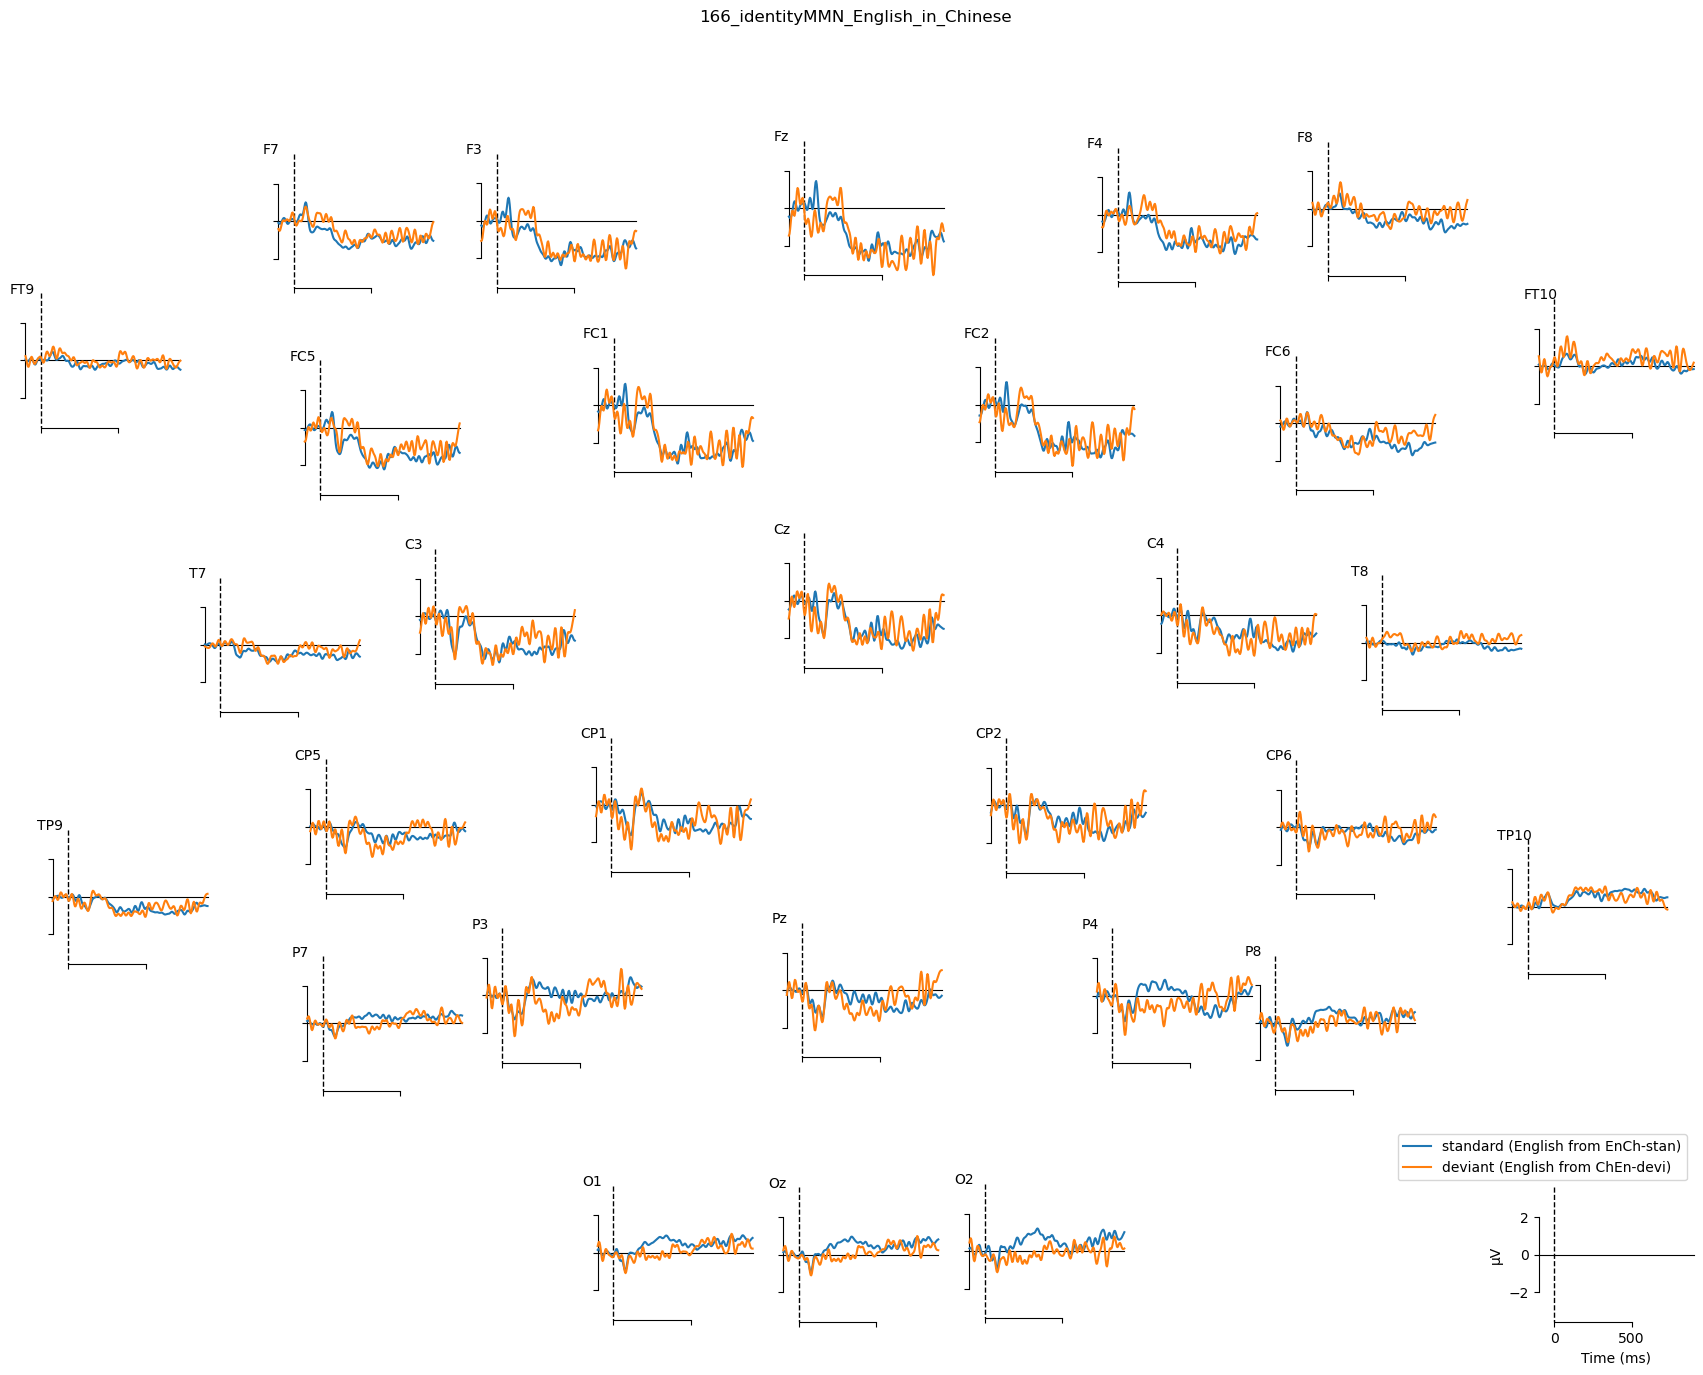

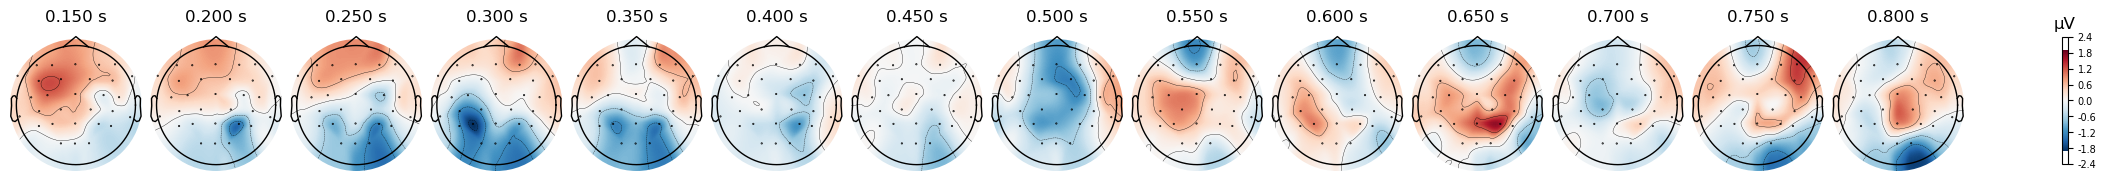

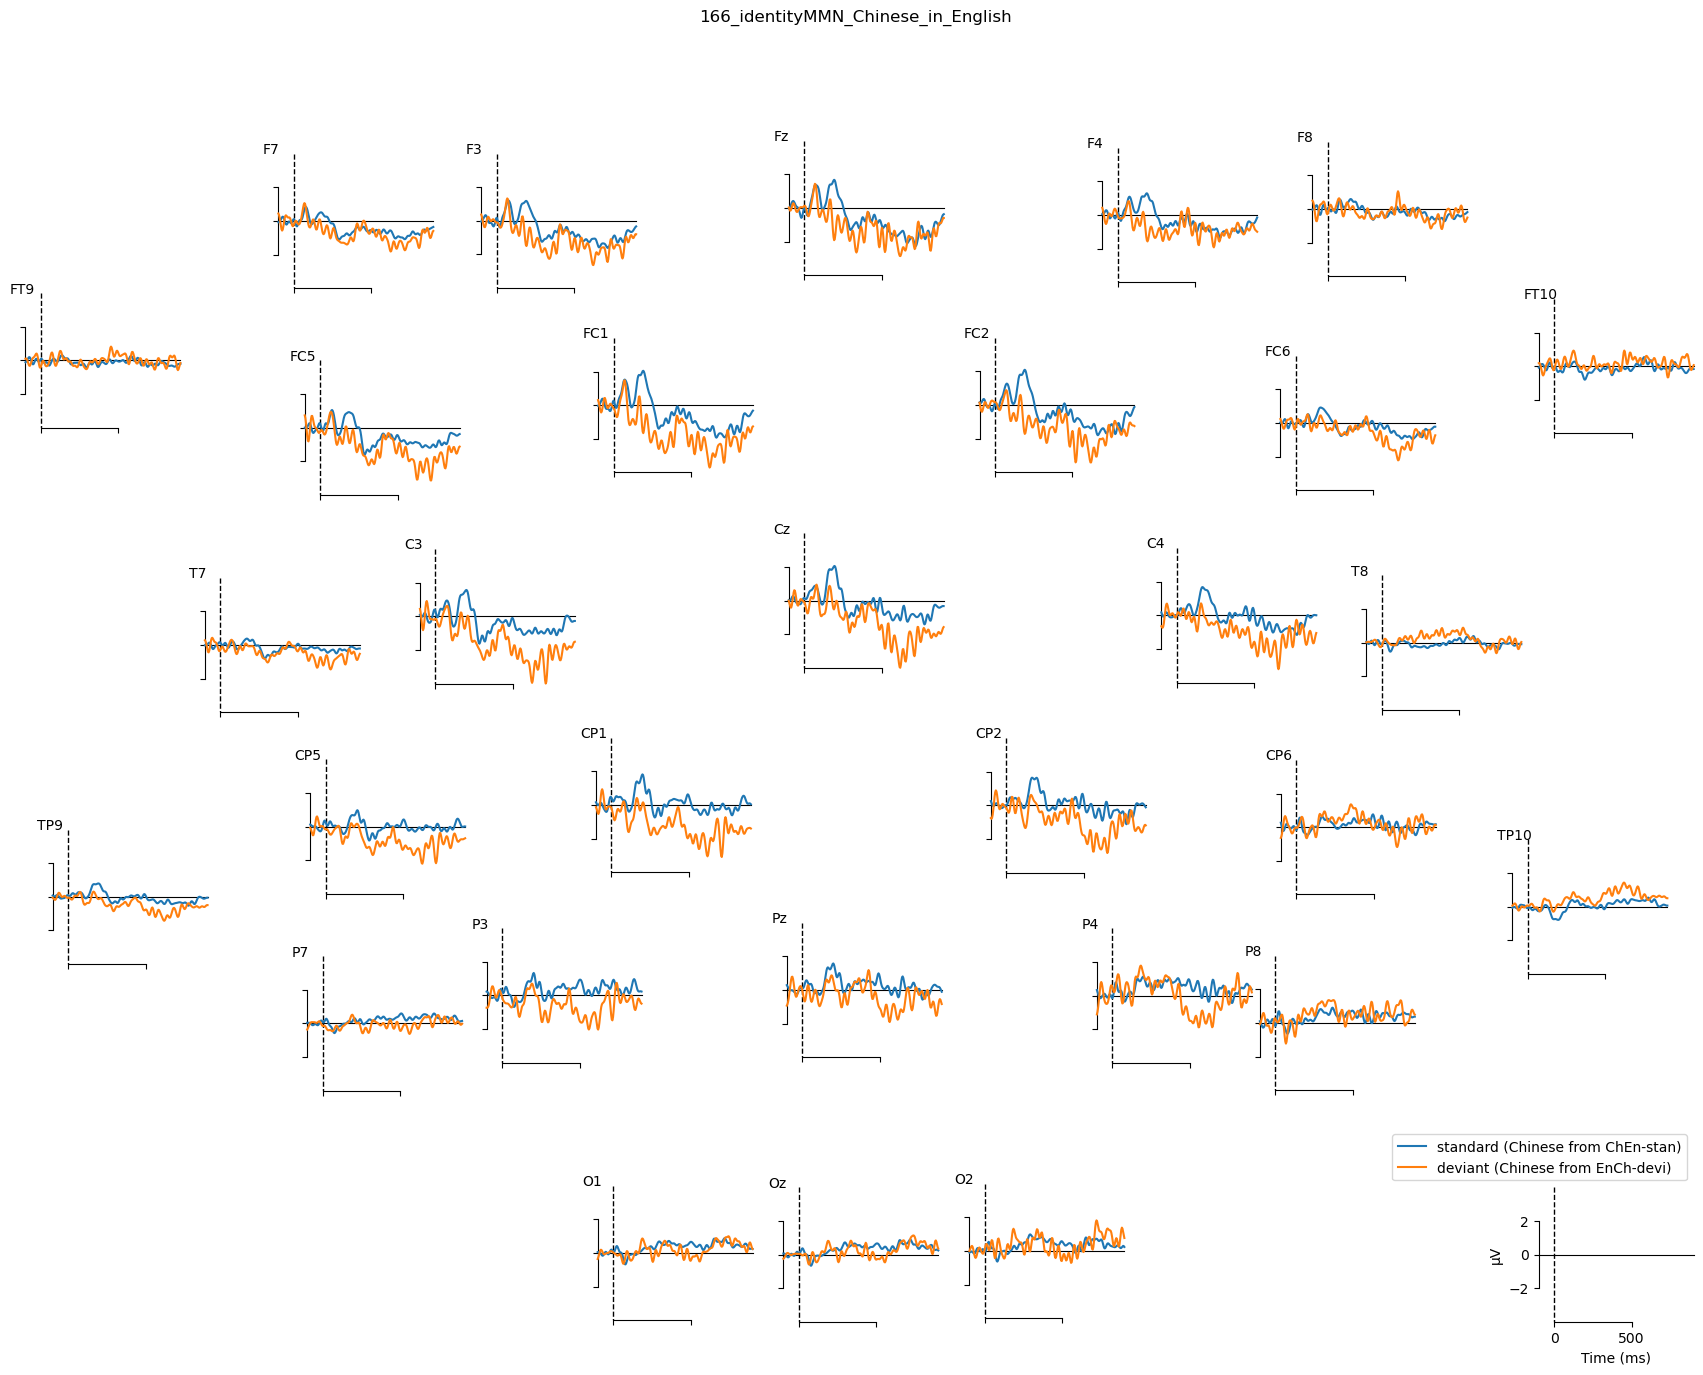

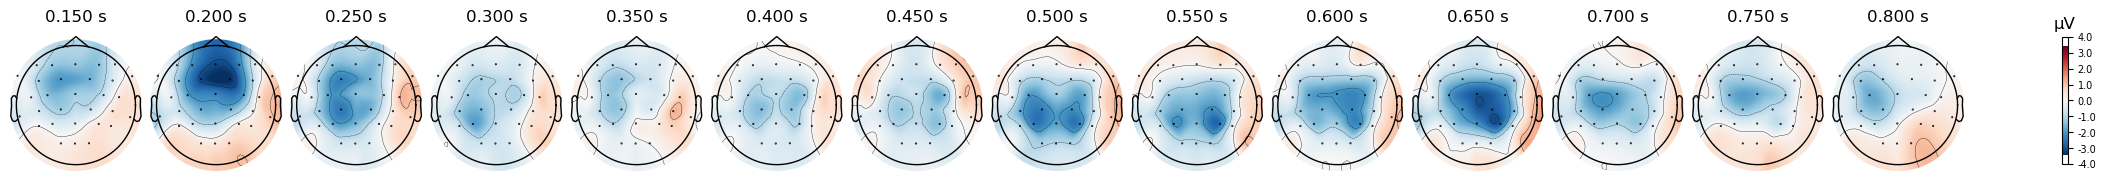

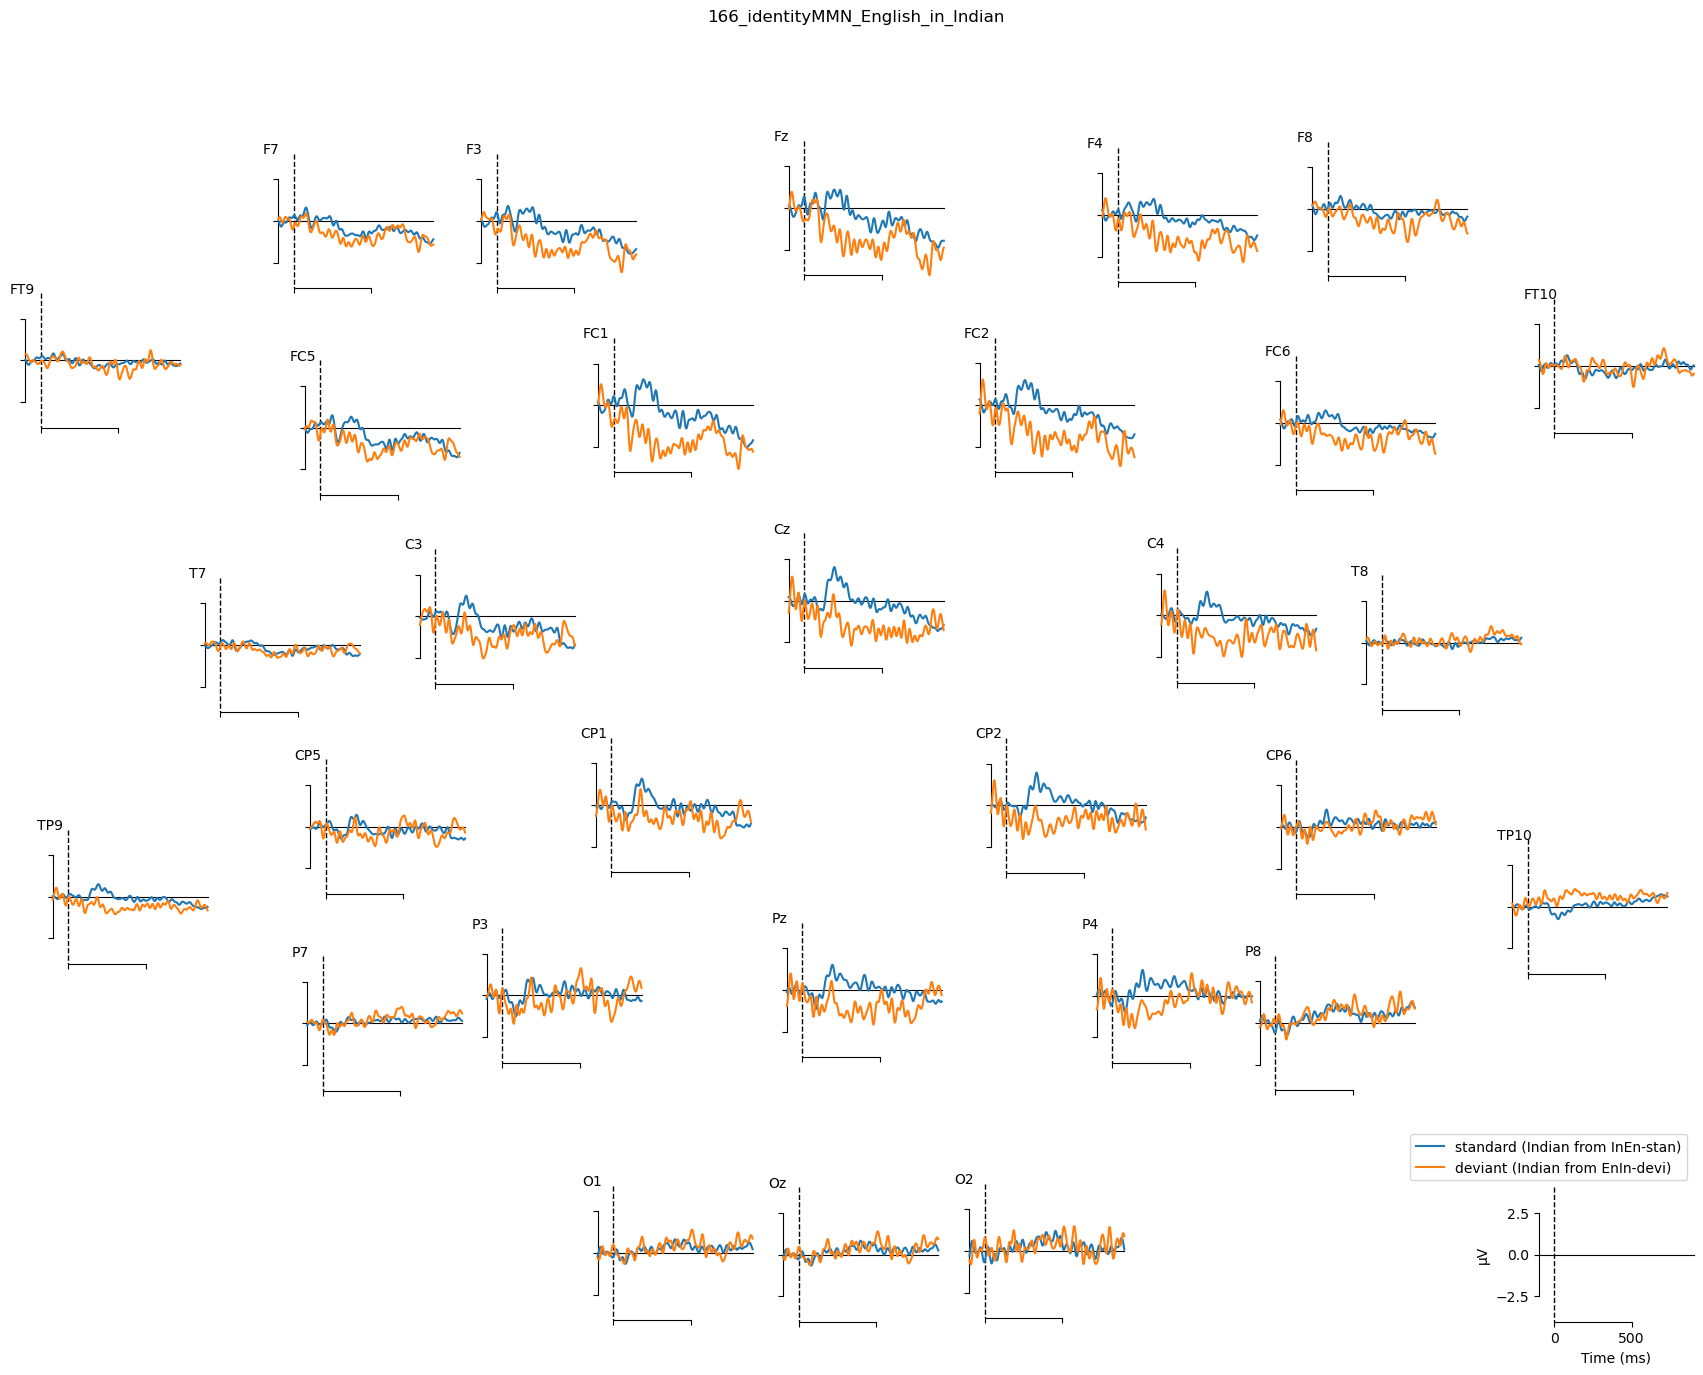

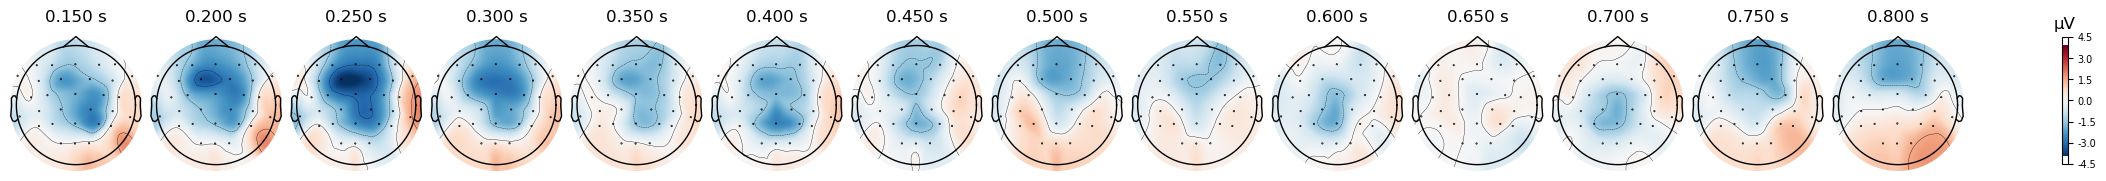

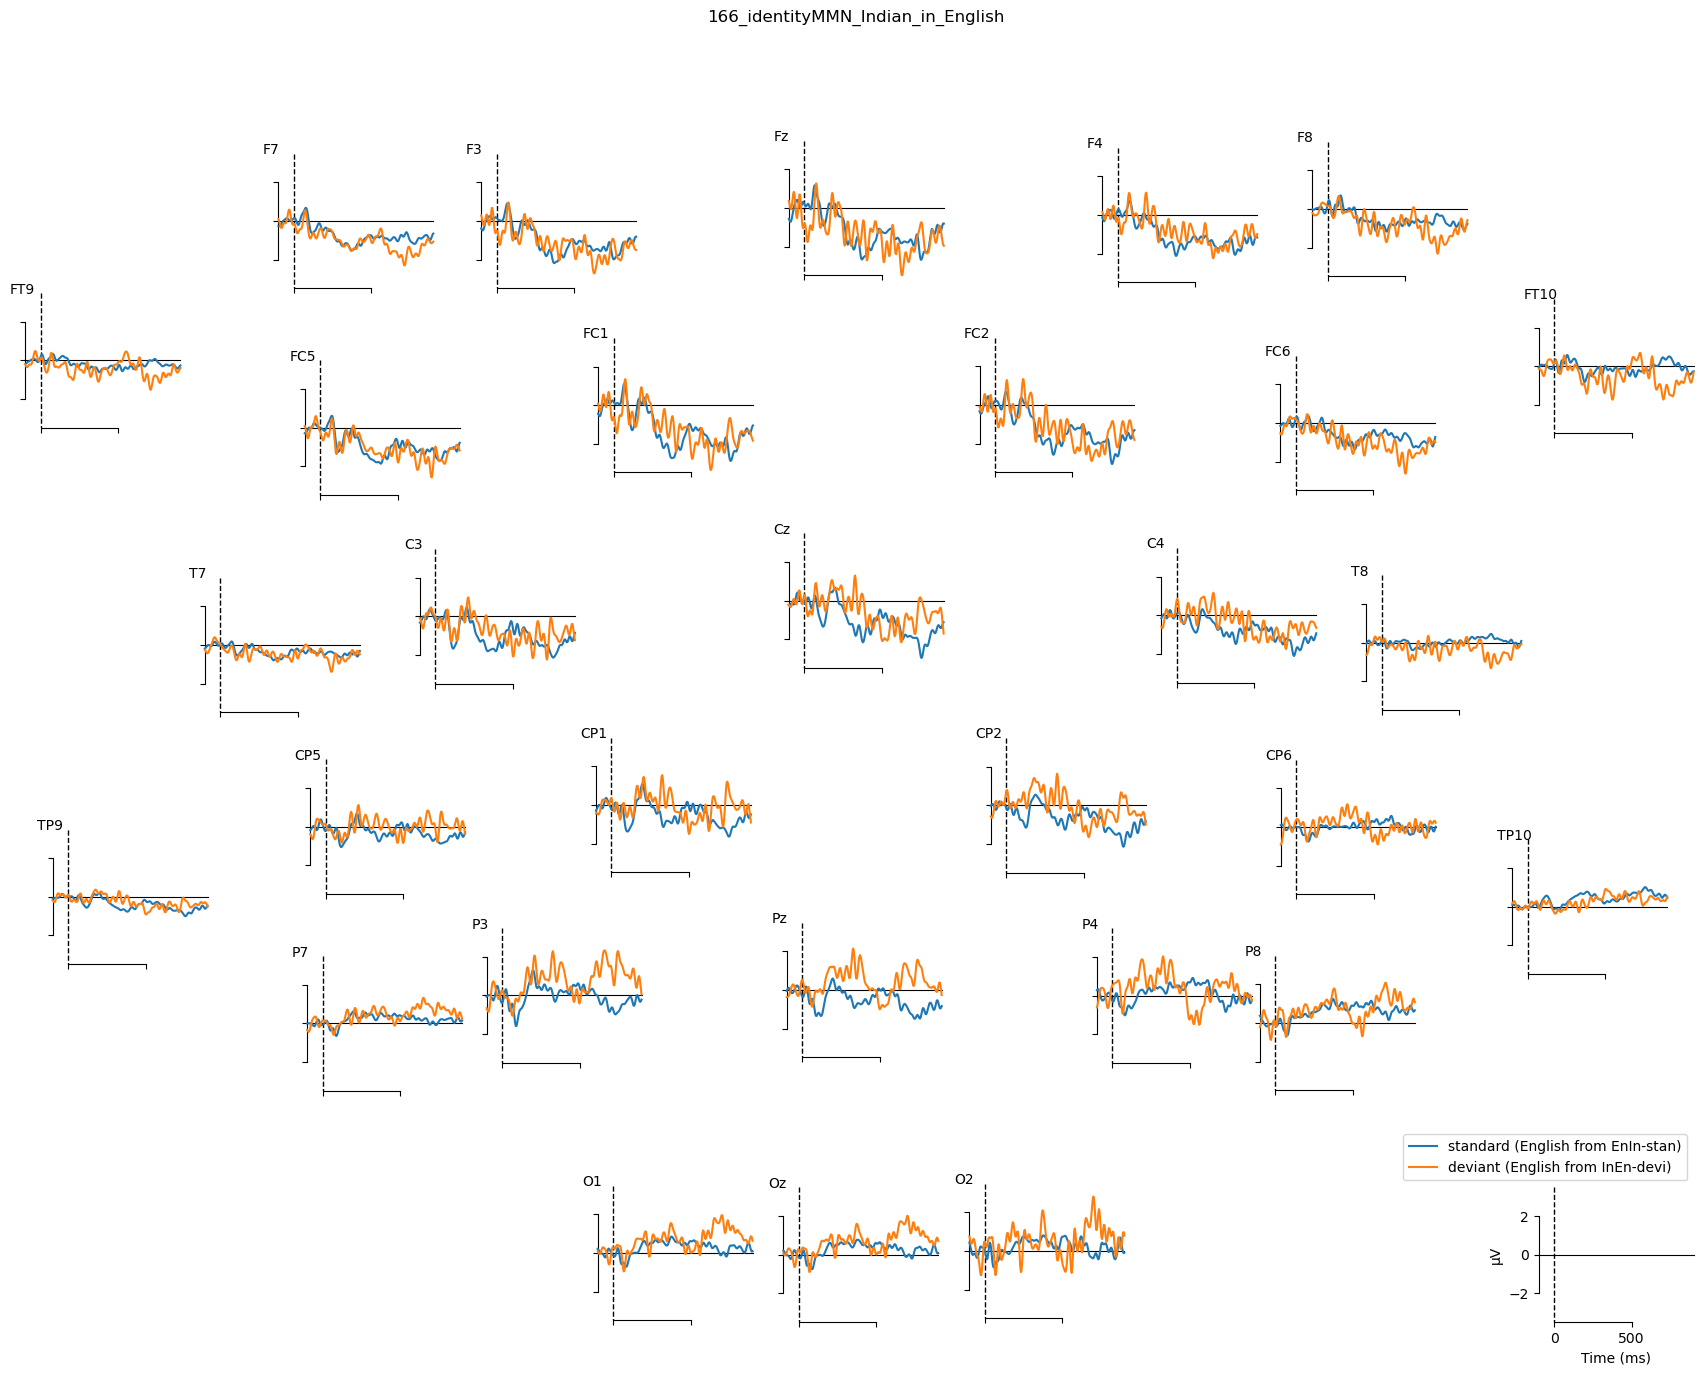

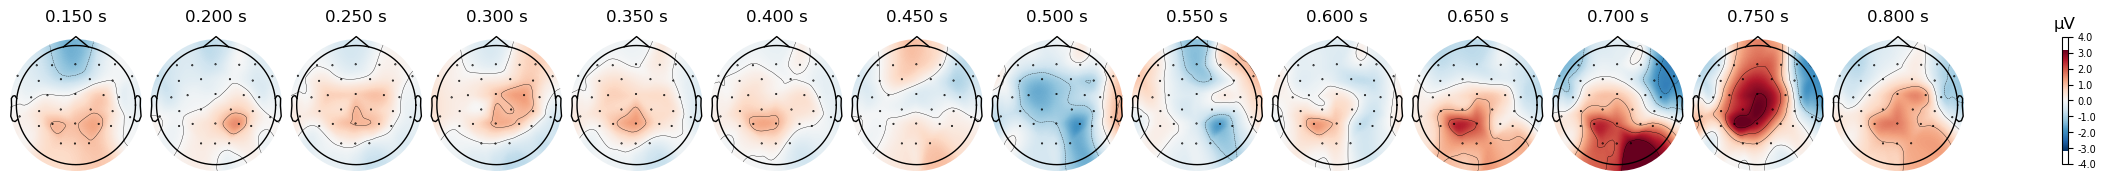

In [288]:
#### directory ####
input_dir = work_dir + 'data_preprocessed/5_evokeds/'
output_dir = work_dir + 'figures/'

# get subset participants for the cell
ppt = '166'

# times to show in topoplots (in seconds)
times = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

# choose a channel(s) for ERP plot


# create a dictionary for condition key and standard and deviant cells ####
mmn_dict = {
    # 'withinBlockMMN_English_in_Chinese': {'devi': 'ChEn-devi', 'stan': 'ChEn-stan',  'devi_stim': 'English', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Chinese_in_English': {'devi': 'EnCh-devi', 'stan': 'EnCh-stan',  'devi_stim': 'Chinese', 'stan_stim': 'English'},
    'identityMMN_English_in_Chinese': {'devi': 'ChEn-devi', 'stan': 'EnCh-stan',     'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Chinese_in_English': {'devi': 'EnCh-devi', 'stan': 'ChEn-stan',     'devi_stim': 'Chinese', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Indian_in_English': {'devi': 'EnIn-devi', 'stan': 'EnIn-stan',   'devi_stim': 'Indian', 'stan_stim': 'English'},
    # 'withinBlockMMN_English_in_Indian': {'devi': 'InEn-devi', 'stan': 'InEn-stan',   'devi_stim': 'English', 'stan_stim': 'Indian'},
    'identityMMN_English_in_Indian': {'devi': 'EnIn-devi', 'stan': 'InEn-stan',      'devi_stim': 'Indian', 'stan_stim': 'Indian'},
    'identityMMN_Indian_in_English': {'devi': 'InEn-devi', 'stan': 'EnIn-stan',      'devi_stim': 'English', 'stan_stim': 'English'},
}



file = ppt + '_ave.fif'

for mmn in mmn_dict.keys():
    
    # single-subject, single-condition butterfly
    erp_stan = mne.read_evokeds(fname=input_dir+file, condition=mmn_dict[mmn]['stan'], verbose='WARNING')
    erp_devi = mne.read_evokeds(fname=input_dir+file, condition=mmn_dict[mmn]['devi'], verbose='WARNING')
    erp_diff = mne.combine_evoked([erp_devi, erp_stan], weights=[1,-1])
    
    # get legends
    legend_stan = 'standard (' + mmn_dict[mmn]['stan_stim'] + ' from ' + mmn_dict[mmn]['stan'] + ')'
    legend_devi = 'deviant (' + mmn_dict[mmn]['devi_stim'] + ' from ' + mmn_dict[mmn]['devi'] + ')'
    legend_diff = 'deviants minus standards'
    
    # # colors
    # color_devi = "crimson"
    # color_stan = "steelblue"
    # color_diff = 'black'
    
    
    ##########################
    ####  ERP Topographical subplot and ROI waveforms ####
    ##########################
    
    
    # combine data for plotting
    evokeds = {}
    evokeds[legend_stan] = erp_stan.filter(l_freq=None, h_freq=30, verbose='WARNING')
    evokeds[legend_devi] = erp_devi.filter(l_freq=None, h_freq=30, verbose='WARNING')
    # evokeds[legend_diff] = erp_diff.filter(l_freq=None, h_freq=30)
    
    
    
    ################################
    #### Topographical subplots ####
    ################################
    
    
    # figure title for the waveform
    title = ppt + '_' + mmn
    
    ##############################
    # waveforms across scalp topo
    # NOTE: I don't know how to save these plots using the code
    fig = mne.viz.plot_compare_evokeds(
        evokeds,
        axes='topo',
        # picks=pick_chans,
        # combine="mean",
        show_sensors=True,
        # colors=colors,
        title = title,
        # ylim=dict(eeg=[-5, 5]),
        time_unit="ms",
        show=False,
    );
    # figure title for the waveform    
    ##############################
    # waveforms across scalp topo
    # NOTE: I don't know how to save these plots using the code

    erp_diff.filter(l_freq=None, h_freq=30, verbose='WARNING').plot_topomap(times)
##############################
    ##############################

# Grand-average waves and topos

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


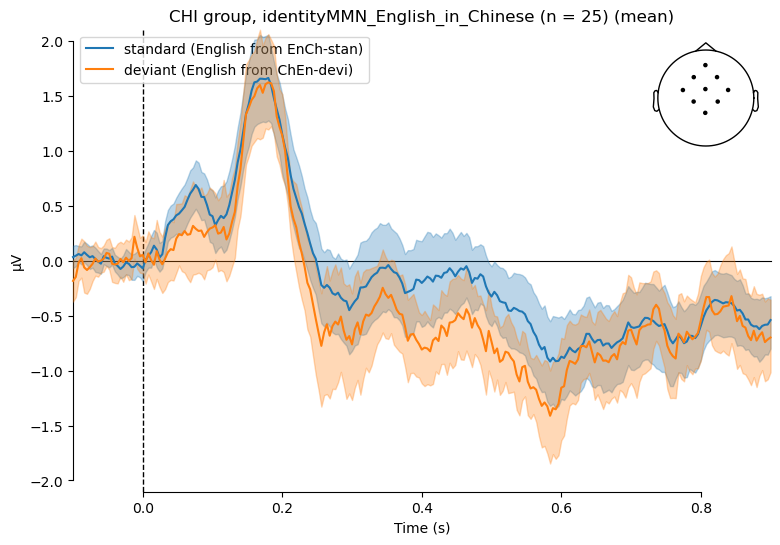

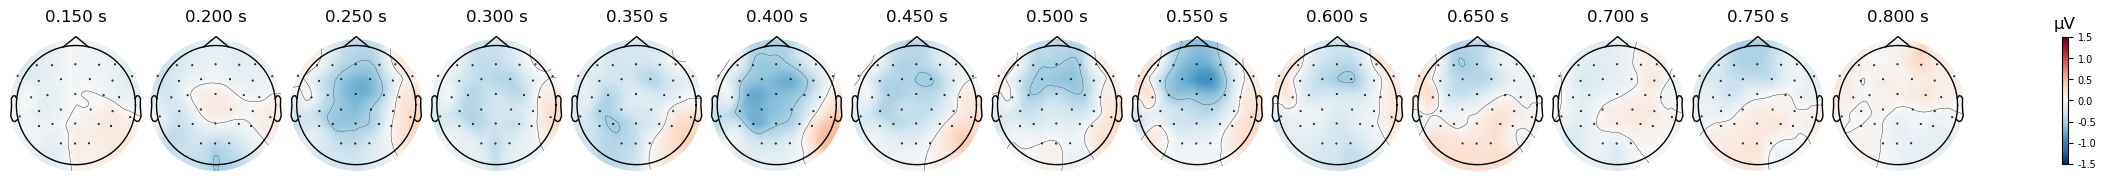

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


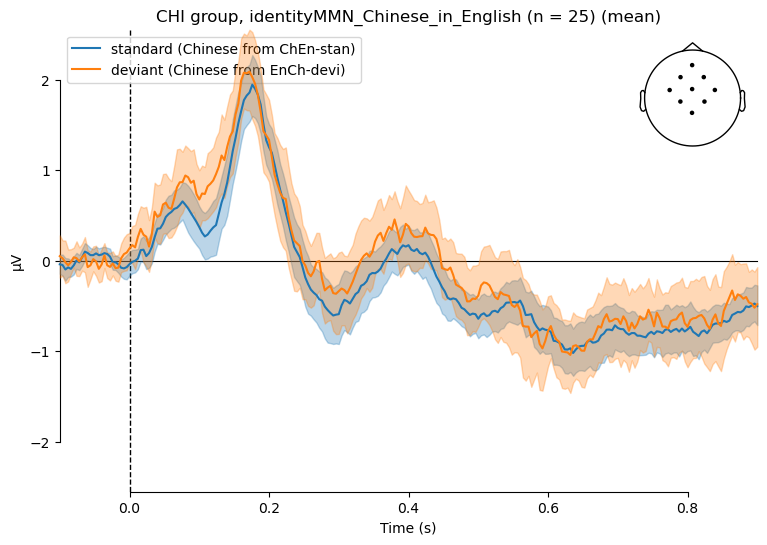

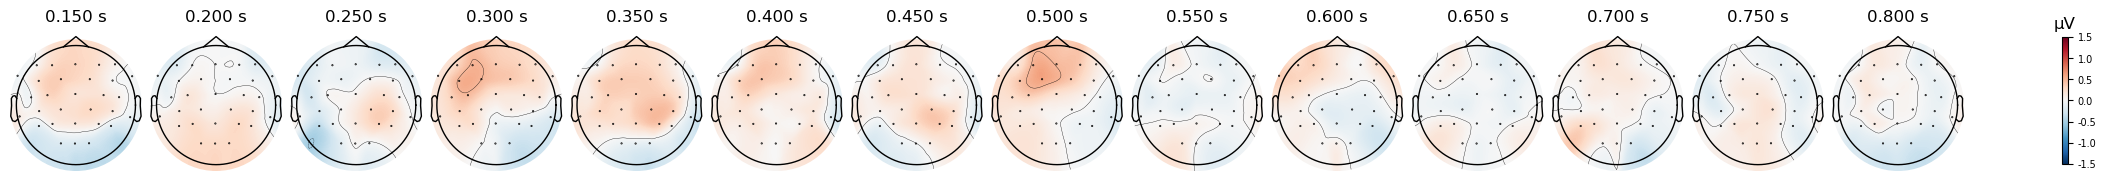

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


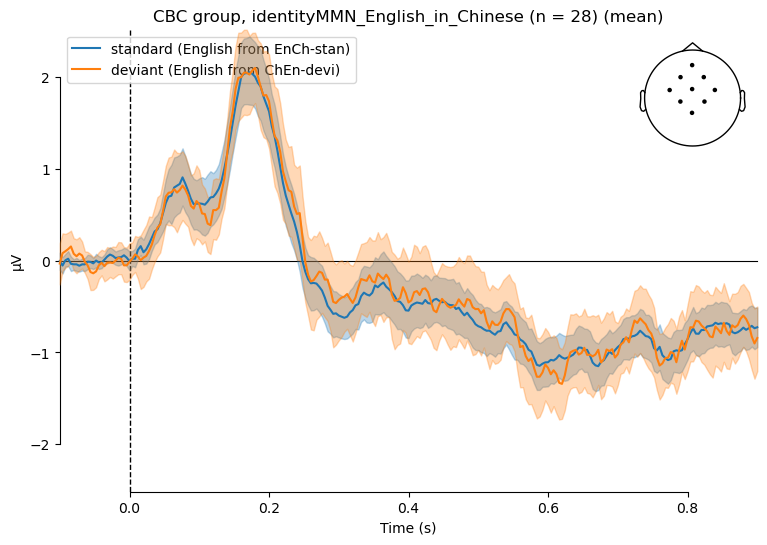

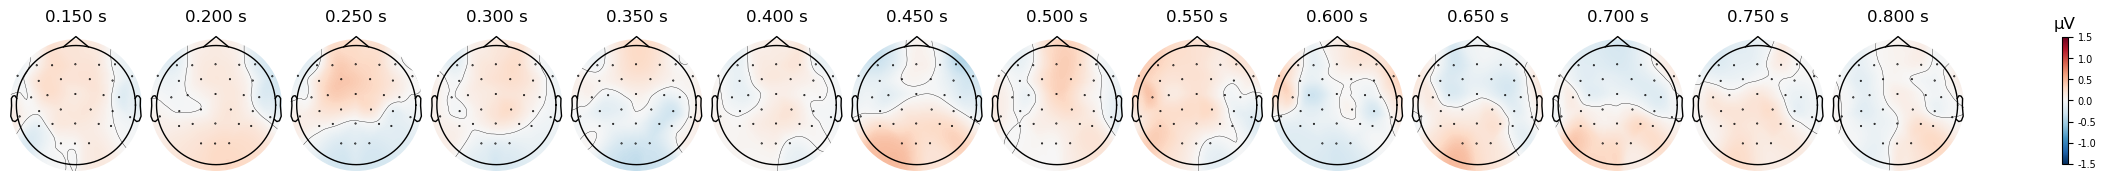

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


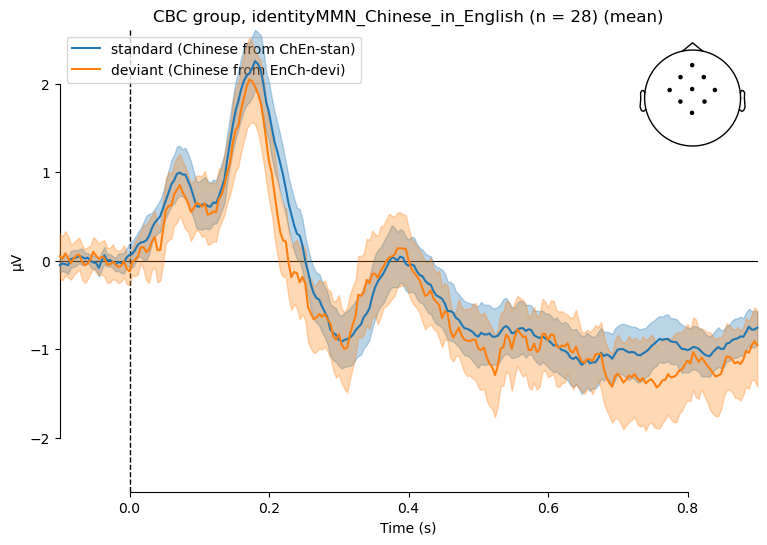

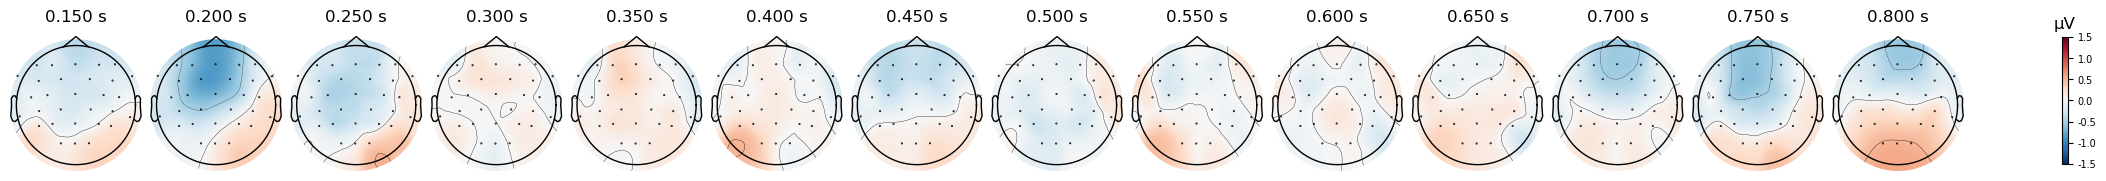

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


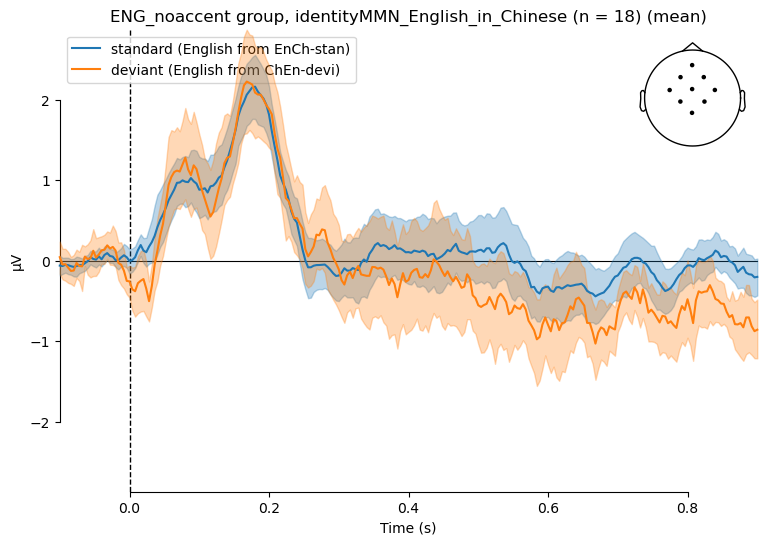

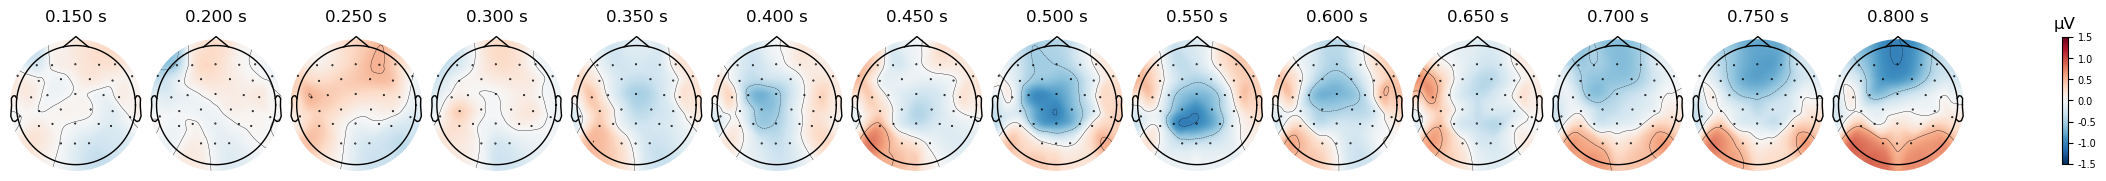

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


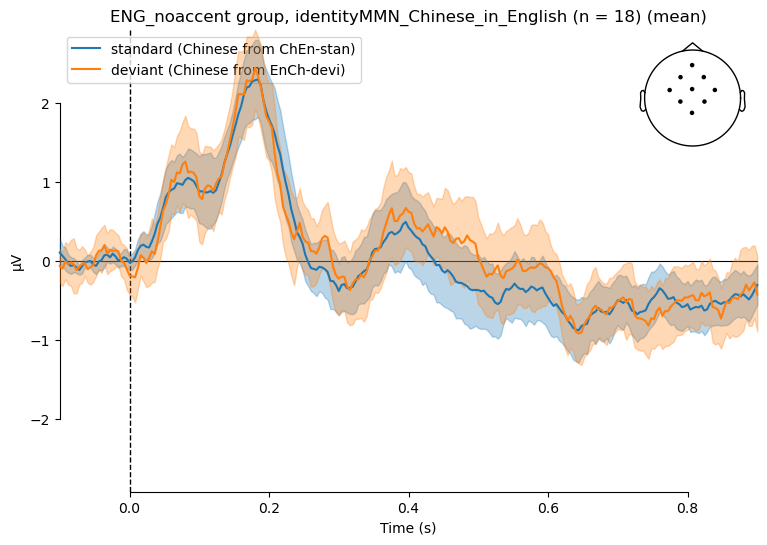

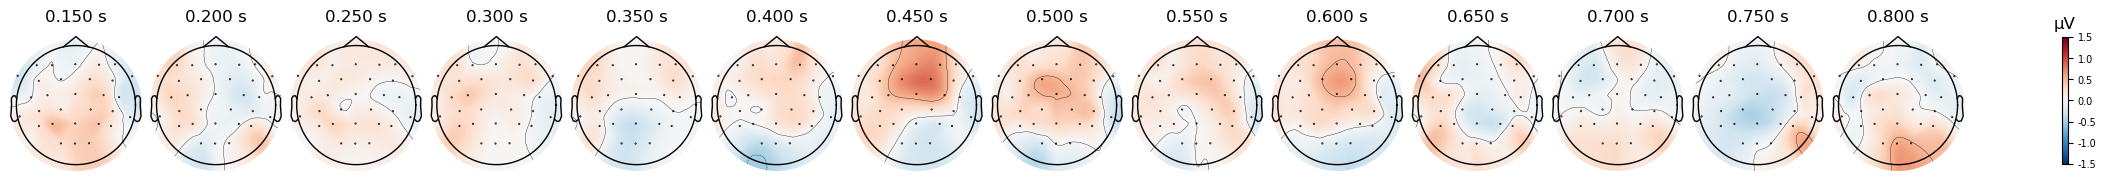

In [293]:
#### directory ####
input_dir = work_dir + 'data_preprocessed/5_evokeds/'
output_dir = work_dir + 'figures/'

# get files
all_inputs = os.listdir(input_dir)
all_outputs = os.listdir(output_dir)

# save the plot?
toggle_save_plot = True
# toggle_save_plot = False

# # colors for each condition?
# color_devi = "crimson"
# color_stan = "steelblue"
# color_diff = 'black'

# times to show in topoplots (in seconds)
times = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

# choose a channel(s) for ERP plot
pick_chans = ['Cz', 'Fz', 'FC1', 'FC2', 'CP1', 'CP2', 'C3', 'C4', 'Pz']
# pick_chans = ['Cz']


# get channel index
ch_inds = np.isin(chan_labels, pick_chans)

# subjects to exclude
exclude_ppts = [
    # '137',
]

# create a dictionary for condition key and standard and deviant cells ####
cell_dict = {
    'identityMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'EnCh-stan', 'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'ChEn-stan', 'devi_stim': 'Chinese', 'stan_stim': 'Chinese'},
    # 'identityMMN_English_in_Indian': {'deviant': 'InEn-devi', 'standard': 'EnIn-stan',  'devi_stim': 'English', 'stan_stim': 'English'},
    # 'identityMMN_Indian_in_English': {'deviant': 'EnIn-devi', 'standard': 'InEn-stan',  'devi_stim': 'Indian', 'stan_stim': 'Indian'},
    # 'withinBlockMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'ChEn-stan', 'devi_stim': 'English', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'EnCh-stan', 'devi_stim': 'Chinese', 'stan_stim': 'English'},
}



##############################
##############################
# for each group
for group in ppt_dict.keys():
    # get participant list
    subset_ppts = []
    for file in all_inputs:
        ppt = file.split('_')[0]
        # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
        if (ppt in ppt_dict[group]) and (ppt not in exclude_ppts):
            # append that subject to the list
            subset_ppts.append(ppt)

    # for each cell
    for cell in cell_dict.keys():
        
        # get legends
        legend_stan = 'standard (' + cell_dict[cell]['stan_stim'] + ' from ' + cell_dict[cell]['standard'] + ')'
        legend_devi = 'deviant (' + cell_dict[cell]['devi_stim'] + ' from ' + cell_dict[cell]['deviant'] + ')'
        legend_diff = 'deviants minus standards'
        
        # extract ERPs
    
        # initialize list
        erp_stan = []
        erp_devi = []
        erp_diff = []
    
        # for each subject
        for ppt in subset_ppts:

            # standard erp
            tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=cell_dict[cell]['standard'], verbose='WARNING')
            # deviant erp
            tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[cell]['deviant'], verbose='WARNING')
            # compute temporary difference erp
            tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                          weights=[1,-1])
            # append temporary data to list
            erp_stan.append(tmp_stan)
            erp_devi.append(tmp_devi)
            erp_diff.append(tmp_diff)
    
        # compute grand average of difference waves
        grand_avg_diff = mne.grand_average(erp_diff)
        
        
        # combine data for plotting
        evokeds = {}
        evokeds[legend_stan] = erp_stan
        evokeds[legend_devi] = erp_devi
        # evokeds[legend_diff] = erp_diff
        
        # # set colors
        # colors = {}
        # colors[legend_stan] = color_stan
        # colors[legend_devi] = color_devi
        # colors[legend_diff] = color_diff
        
        
        # ################################
        # #### plot gav waveform ####
        # ################################
        
        # figure title for the waveform
        waveform_title = group + ' group, ' + cell + ' (n = ' + str(len(subset_ppts)) + ')'

        wave, ax = plt.subplots(1, 1, figsize=(9, 6))
        
        mne.viz.plot_compare_evokeds(
            evokeds,
            axes=ax,
            picks=pick_chans,
            combine="mean",
            show_sensors=True,
            # colors=colors,
            title = waveform_title,
            # ylim=dict(eeg=[-5, 5]),
            time_unit="s",
            show=False
        )
        # save fig
        if toggle_save_plot:
            wave.savefig(output_dir + '/wave_' + group + '_' + cell +'.png')
        
        
        #### topomap of difference wave (deviants minus standards) ####
        
        #### plotting topo ####
        topo = grand_avg_diff.plot_topomap(
            ch_type="eeg", 
            times=times, 
            colorbar=True,
            vlim = (-1.5,1.5)
        )
        
        # save fig
        if toggle_save_plot:
            topo.savefig(output_dir + '/topo_' + group + '_' + cell +'.png')

In [ ]:
#### combine figures into one ####
mmn_type = 'withinBlockMMN'
wave_files = [
    # 'wave_ENG_identityMMN_Chinese_in_English',
    # 'wave_ENG_identityMMN_English_in_Chinese',
    # 'wave_CHI_identityMMN_Chinese_in_English',
    # 'wave_CHI_identityMMN_English_in_Chinese',     
    # 'wave_SOME_identityMMN_Chinese_in_English', 
    # 'wave_SOME_identityMMN_English_in_Chinese',
    
    'wave_ENG_withinBlockMMN_Chinese_in_English',
    'wave_ENG_withinBlockMMN_English_in_Chinese',
    'wave_CHI_withinBlockMMN_Chinese_in_English',
    'wave_CHI_withinBlockMMN_English_in_Chinese',     
    'wave_SOME_withinBlockMMN_Chinese_in_English', 
    'wave_SOME_withinBlockMMN_English_in_Chinese',
]

topo_files = [
    'topo_ENG_withinBlockMMN_Chinese_in_English',
    'topo_ENG_withinBlockMMN_English_in_Chinese',
    'topo_CHI_withinBlockMMN_Chinese_in_English',
    'topo_CHI_withinBlockMMN_English_in_Chinese',     
    'topo_SOME_withinBlockMMN_Chinese_in_English', 
    'topo_SOME_withinBlockMMN_English_in_Chinese',
]

# combine figures
# initialize
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
# read in image and combine
for ax, wave, topo in zip(axes, wave_files, topo_files):

    # hid main axis
    ax.axis('off')

    # get position of the main axis
    pos = ax.get_position()

    # use top 80% for waveform
    ax_wave = fig.add_axes([pos.x0, pos.y0+0.2*pos.height, pos.width, 0.8*pos.height])
    img_wave = mpimg.imread(output_dir + '/' + wave + '.png')
    ax_wave.imshow(img_wave)
    ax_wave.axis('off')

    # use bottom 20% for topoplot
    ax_topo = fig.add_axes([pos.x0, pos.y0, pos.width, 0.2*pos.height])
    img_topo = mpimg.imread(output_dir + '/' + topo + '.png')
    ax_topo.imshow(img_topo)
    ax_topo.axis('off')

# save
plt.tight_layout()
plt.savefig(output_dir + '/' + mmn_type + '_combined.png', dpi=300)
plt.close()
########################################

# Spatio-temporal permutation

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30
stat_fun(H1): min=-4.638588087111522 max=4.316421576536716
Running initial clustering …
Found 91 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CHI identityMMN_English_in_Chinese significant clusters =====
[81]
combining channels using "mean"
combining channels using "mean"
stat_fun(H1): min=-3.411288471812941 max=4.616762465363412
Running initial clustering …
Found 71 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CHI identityMMN_Chinese_in_English significant clusters =====
[]
stat_fun(H1): min=-3.1520857765835744 max=3.5402458465506776
Running initial clustering …
Found 65 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CBC identityMMN_English_in_Chinese significant clusters =====
[]
stat_fun(H1): min=-4.835747248228001 max=4.486838180978881
Running initial clustering …
Found 56 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CBC identityMMN_Chinese_in_English significant clusters =====
[]
stat_fun(H1): min=-5.402450610479552 max=3.8940053804281
Running initial clustering …
Found 88 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== ENG_noaccent identityMMN_English_in_Chinese significant clusters =====
[67 78]
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
stat_fun(H1): min=-4.260300677164875 max=4.787188572248733
Running initial clustering …
Found 74 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== ENG_noaccent identityMMN_Chinese_in_English significant clusters =====
[]


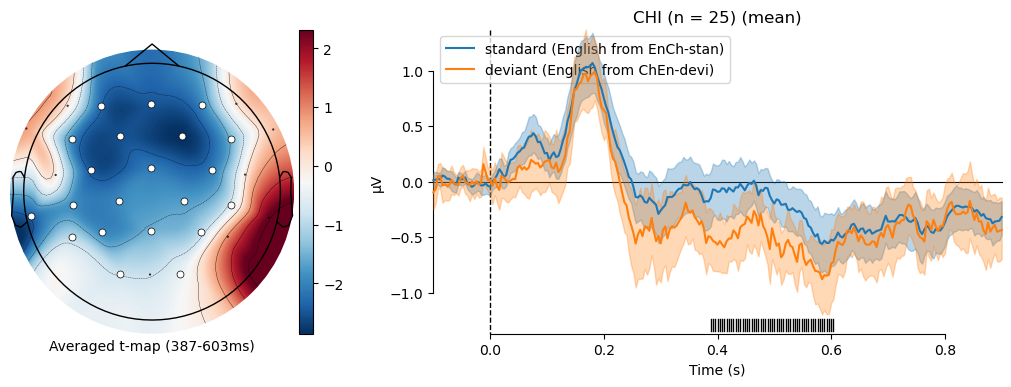

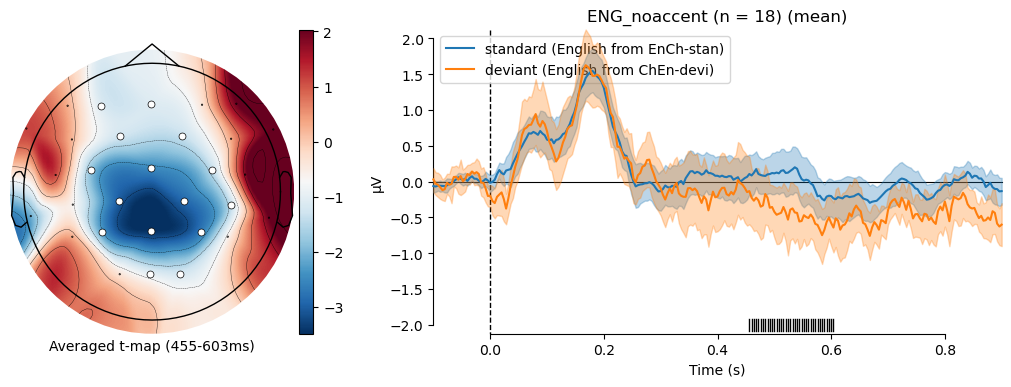

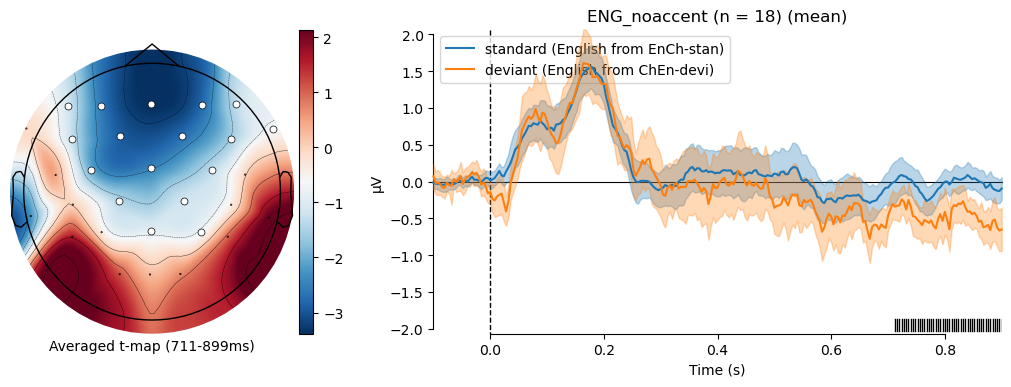

In [294]:
############################
#### Parameters ############
############################


# create a dictionary for condition key and standard and deviant cells ####
cell_dict = {
    'identityMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'EnCh-stan', 'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'ChEn-stan', 'devi_stim': 'Chinese', 'stan_stim': 'Chinese'},
    # 'identityMMN_English_in_Indian': {'deviant': 'InEn-devi', 'standard': 'EnIn-stan',  'devi_stim': 'English', 'stan_stim': 'English'},
    # 'identityMMN_Indian_in_English': {'deviant': 'EnIn-devi', 'standard': 'InEn-stan',  'devi_stim': 'Indian', 'stan_stim': 'Indian'},
    # 'withinBlockMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'ChEn-stan', 'devi_stim': 'English', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'EnCh-stan', 'devi_stim': 'Chinese', 'stan_stim': 'English'},
}



# participants to exclude
exclude_ppts = [
    # '137',
]

# channel adjacency
adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')

######### function ##########
def my_permutation_func(group, mmn):
    
    # extract ERPs for each condition
    erp_diff = []
    
    # for each participant
    for ppt in subset_ppts:
    
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[mmn]['standard'], verbose='WARNING')
        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition=cell_dict[mmn]['deviant'], verbose='WARNING')
        # compute temporary difference erp
        tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_diff.append(tmp_diff)
    
        del tmp_stan, tmp_devi, tmp_diff
        
    
    # extract data for stats
    X = np.stack([x.get_data() for x in erp_diff], axis=0)
    # reshape the data for stats analysis
    X = np.transpose(X, [0, 2, 1]) # output: participant x time x channel
    
    # print(X.shape)
    
    ###################################
    #### cluster-based permutation ####
    ###################################
    
    # Here we set a cluster forming threshold based on a p-value for
    # the cluster based permutation test.
    # We use a two-tailed threshold, the "1 - p_threshold" is needed
    # because for two-tailed tests we must specify a positive threshold.
    p_thresh = 0.05  # arbitrary
    n_observations = X.shape[0]
    df = n_observations - 1  # degrees of freedom for the test
    
    # two-tailed test
    tail = 0
    t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df)
    
    # one tail, 1 for higher tail, -1 for lower tail
    # tail = -1
    # t_thresh = scipy.stats.t.ppf(p_thresh, df)
    
    
    # Run the analysis
    T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X,
        adjacency=adjacency,
        threshold=t_thresh,
        tail=tail,
        # out_type="mask",
        # seed = 42 # set random seed
    )
    
    #########################
    #### select clusters ####
    #########################
    
    # Select the clusters that are statistically significant at p < 0.05
    p_accept = 0.05
    good_clusters_idx = np.where(cluster_p_values < p_accept)[0]
    
    print('===== ' + group + ' ' + mmn + ' significant clusters =====')
    print(good_clusters_idx)

    return subset_ppts, good_clusters_idx, clusters, T_obs
            

# # visualize
# mne.viz.plot_ch_adjacency(evoked.info, chan_adj, chan_names)
# plt.show()
for group in ppt_dict.keys():
    for mmn in cell_dict.keys():

        # get participant list
        subset_ppts = []
        for file in all_inputs:
            ppt = file.split('_')[0]
            # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
            if (ppt in ppt_dict[group]) and (ppt not in exclude_ppts):
                # append that subject to the list
                subset_ppts.append(ppt)

        # apply function
        subset_ppts, good_clusters_idx, clusters, T_obs = my_permutation_func(group,  mmn)
        
        ## visualize clusters

        #######################
        #### visualization ####
        #######################
        
        #### parameter ####
        toggle_save_plot = True
        
        # get legends
        legend_stan = 'standard (' + cell_dict[mmn]['stan_stim'] + ' from ' + cell_dict[mmn]['standard'] + ')'
        legend_devi = 'deviant (' + cell_dict[mmn]['devi_stim'] + ' from ' + cell_dict[mmn]['deviant'] + ')'
        legend_diff = 'deviants minus standards'
        
        # title
        permutation_wave_title = group + ' (n = ' + str(len(subset_ppts)) + ')'
        
        # extract ERPs for each condition
        erp_stan = []
        erp_devi = []
        
        # for each participant
        for ppt in subset_ppts:
        
            # standard erp
            tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=cell_dict[mmn]['standard'], verbose='WARNING')
            # deviant erp
            tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[mmn]['deviant'], verbose='WARNING')
            # compute temporary difference erp
            tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                          weights=[1,-1])
            # append temporary data to list
            erp_stan.append(tmp_stan)
            erp_devi.append(tmp_devi)
    
            # organize data for plotting
            evokeds = {
                legend_stan: erp_stan,
                legend_devi: erp_devi,
            }
        
            del tmp_stan, tmp_devi, tmp_diff
        
        if len(good_clusters_idx) > 0:
                    
            # loop over clusters
            for ith_cluster in range(len(good_clusters_idx)):
                # unpack cluster information, get unique indices
                time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[ith_cluster]])
        
                # get unique channel and time indices
                ch_inds = np.unique(space_inds)
                time_inds = np.unique(time_inds)             
                
                # get topography for F stat
                t_map = T_obs[time_inds, ...].mean(axis=0)
        
                # get signals at the sensors contributing to the cluster
                sig_times = evoked.times[time_inds]
        
                # create spatial mask
                mask = np.zeros((t_map.shape[0], 1), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
                mask[ch_inds, :] = True
        
                # initialize figure
                fig, ax_topo = plt.subplots(1, 1, figsize=(10, 10), layout="constrained")

        
                # plot topos of average test statistic and mark significant sensors
                t_evoked = mne.EvokedArray(t_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
                t_evoked.plot_topomap(
                    times=0,
                    mask=mask,
                    axes=ax_topo,
                    # cmap="jet",
                    vlim=(np.min, np.max),
                    show=False,
                    colorbar=False,
                    mask_params=dict(markersize=10),
                )
                image = ax_topo.images[0]
        
                # remove the title that would otherwise say "0.000 s"
                ax_topo.set_title("")
        
                # create additional axes (for ERF and colorbar)
                divider = make_axes_locatable(ax_topo)
        
                # add axes for colorbar
                ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(image, cax=ax_colorbar)
                ax_topo.set_xlabel(
                    "Averaged t-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
                )
        
                # add new axis for time courses and plot time courses
                ax_signals = divider.append_axes("right", size="200%", pad=1.2)
        
                # plot waveforms
                mne.viz.plot_compare_evokeds(
                    evokeds,
                    title=permutation_wave_title,
                    picks=ch_inds,
                    axes=ax_signals,
                    # colors=colors,
                    # linestyles=linestyles,
                    show=False,
                    split_legend=True,
                    truncate_yaxis="auto",
                    combine="mean",
                )
                
        
                # plot temporal cluster extent
                for t in sig_times:
                    ax_signals.axvline(t, ymin=0.01, ymax=0.05, color="black", linewidth=1)
        
                # save
                if toggle_save_plot:
                    fig.savefig(output_dir + 'erp_permutation_' + group + '_' + mmn + '.png')

# By-channel Temporal permutation

In [347]:
output_dir = work_dir + 'figures/'


# mne.viz.plot_ch_adjacency(evoked.info, chan_adj, chan_names)
# plt.show()
times = [int(x)/1000 for x in time_labels]

In [348]:
######### function ##########
def my_permutation_func(group, mmn, chan):
    
    # extract ERPs for each condition
    erp_stan = []
    erp_devi = []
    erp_diff = []
    
    # for each participant
    for ppt in subset_ppts:
    
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[mmn]['standard'], verbose='WARNING')
        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition=cell_dict[mmn]['deviant'], verbose='WARNING')
        # compute temporary difference erp
        tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_stan.append(tmp_stan.pick(chan))
        erp_devi.append(tmp_devi.pick(chan))
        erp_diff.append(tmp_diff.pick(chan))
    
        del tmp_stan, tmp_devi, tmp_diff

        # organize data for plotting
        evokeds = {
            legend_stan: erp_stan,
            legend_devi: erp_devi,
        }
        
    
    # extract data for stats
    X = np.stack([x.get_data() for x in erp_diff], axis=0)
    X = X.squeeze() # output: participant x time
    
    # print(X.shape)
    
    ##################################
    ### cluster-based permutation ####
    ##################################
    
    # Here we set a cluster forming threshold based on a p-value for
    # the cluster based permutation test.
    # We use a two-tailed threshold, the "1 - p_threshold" is needed
    # because for two-tailed tests we must specify a positive threshold.
    p_thresh = 0.1  # arbitrary
    n_observations = X.shape[0]
    df = n_observations - 1  # degrees of freedom for the test
    
    # # two-tailed test
    # tail = 0
    # t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df)
    
    # # one tail, 1 for higher tail, -1 for lower tail
    tail = -1
    t_thresh = scipy.stats.t.ppf(p_thresh, df)
    
    
    # Run the analysis
    T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X,
        threshold=t_thresh,
        tail=tail,
        # adjacency=adjacency,
        out_type="mask",
        seed = 42 # set random seed
    )
    
    #########################
    #### select clusters ####
    #########################
    
    # Select the clusters that are statistically significant at p < 0.05
    p_accept = 0.05
    good_clusters_idx = np.where(cluster_p_values < p_accept)[0]

    return good_clusters_idx, clusters, T_obs,evokeds


    # #### mass univariate #### FDR
    # T, pval = scipy.stats.ttest_1samp(X, 0, alternative='less')
    # alpha = 0.1
    
    # n_samples, n_tests = X.shape
    # threshold_uncorrected = scipy.stats.t.ppf(1.0 - alpha, n_samples - 1)
    
    # reject_fdr, pval_fdr = mne.stats.fdr_correction(pval, alpha=alpha, method="indep")
    # threshold_fdr = np.min(np.abs(T)[reject_fdr])

    # return T, threshold_uncorrected, threshold_fdr

In [349]:
for group in ['ENG', 'CHI']:
    # for each cell
    for mmn in cell_dict.keys():

        sig_chans = []
        for chan in chan_labels:
            # get participant list
            subset_ppts = []
            for file in all_inputs:
                ppt = file.split('_')[0]
                # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
                if (ppt in ppt_dict[group]) and (ppt in include_ppts):
                    # append that subject to the list
                    subset_ppts.append(ppt)
            
            good_clusters_idx, clusters, T_obs, evokeds = my_permutation_func(group, mmn, chan)

            if len(good_clusters_idx)>0:
                sig_chans.append(chan)
        
        print(group + ' ' + mmn + ' ' + str(len(subset_ppts)) + ' significant channels:')
        print(sig_chans)
        
            # T, threshold_uncorrected, threshold_fdr = my_permutation_func(group, mmn, chan)
            # print(len(subset_ppts))
            # plt.close("all")
            # plt.plot(times, T, "k", label="T-stat")
            # xmin, xmax = plt.xlim()
            # plt.hlines(
            #     threshold_uncorrected,
            #     xmin,
            #     xmax,
            #     linestyle="--",
            #     colors="k",
            #     label="p=0.05 (uncorrected)",
            #     linewidth=2,
            # )
            # plt.hlines(
            #     threshold_fdr,
            #     xmin,
            #     xmax,
            #     linestyle="--",
            #     colors="b",
            #     label="p=0.05 (FDR)",
            #     linewidth=2,
            # )


stat_fun(H1): min=-4.492163095137029 max=2.1736305632955264
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.248804121399737 max=2.081812731519315
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.5421206183158507 max=2.1064525338748927
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.095890749709043 max=3.6337188246130867
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6291631740301775 max=2.510860527265328
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.7700910290169527 max=1.502107989381193
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.144396032813984 max=1.8401633194778235
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9122269816528097 max=3.394108710719471
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.1805215355729657 max=1.6532143682539278
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.675067177756001 max=1.3504161857131425
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7204861487674927 max=1.5263435267562744
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.2038665343606483 max=1.9258803467200696
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.5307710466487303 max=3.2995767064512638
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.7437792025671746 max=2.8658012660106826
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.1262123572226694 max=2.8460644464486125
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.800280258183825 max=2.6042622614246724
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8932861169524158 max=2.3596541878354995
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9070851276024445 max=2.3791821689203285
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.7153579830518637 max=3.4099905329569142
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.7045465144060623 max=2.0225538844922677
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.2333519751799416 max=1.5324418642057833
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.283820247033792 max=1.0253935171676203
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.655304564515805 max=2.851296247014862
Running initial clustering …
Found 17 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.2930479823491594 max=3.3678596057086363
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.134669457359739 max=1.6821843206273008
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.4974099486050862 max=3.2438843761741585
Running initial clustering …
Found 16 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.9428319635525653 max=2.2888960305485138
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9575341891205458 max=3.774806030843771
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0706084576906476 max=3.126365439355232
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.4099905329569142 max=1.7153579830518637
Running initial clustering …
Found 21 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

ENG identityMMN_English_in_Chinese 27 significant channels:
['Fz', 'F3', 'FC1', 'Cz', 'FC2']
stat_fun(H1): min=-1.889116213720441 max=4.481065643577318
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.125953457785828 max=5.056022370215482
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7379528416041277 max=3.0284056702463977
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.5800485631147994 max=2.377682027168746
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.73346165484739 max=4.948037661367886
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.958108065454245 max=5.691206736322388
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.673488400442948 max=4.948939771530332
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.4225279453366944 max=3.2221701579708206
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.5300857645625525 max=4.5283175554847555
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0620739473085146 max=3.442194825153919
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.077075563581876 max=4.615790494686554
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8408499353726506 max=3.324353881948906
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6279968975748274 max=3.2386671121829775
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.943379922011498 max=2.8321592185623756
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.0622580560372 max=3.152843048487609
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.077442482722897 max=2.7989060028090793
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.721599154595556 max=3.656217078485257
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9746449897232263 max=3.1054027174451897
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.768593371088247 max=2.412887475449921
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7132125722875085 max=4.431869913923865
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9080814093688727 max=4.023655277031974
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8372872943732343 max=5.459739905700757
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.6188818806390886 max=5.632155934953815
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6586896665207673 max=1.8314393491535546
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.143257161309781 max=2.042084101951956
Running initial clustering …
Found 18 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.4891037206409212 max=3.6945941983676693
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.5090478572077983 max=5.509851828909848
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.4043430003193547 max=4.49931891321564
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.5824447811042974 max=2.549368909014773
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.412887475449921 max=4.768593371088247
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

ENG identityMMN_Chinese_in_English 27 significant channels:
['TP10']
stat_fun(H1): min=-2.4120365190240203 max=3.082061754419033
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.578446977820221 max=2.971002155735449
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.1458095665181713 max=1.7552777041245358
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.3910431712639704 max=1.674236670499547
Running initial clustering …
Found 19 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.846911308692798 max=2.7013791894246233
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.0525923337451566 max=3.2975717482902005
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.017686766417196 max=2.294683717963516
Running initial clustering …
Found 21 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.509939249493575 max=2.1458936600062875
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.0590702571021957 max=2.236642694809104
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.390604865961979 max=2.24549082776027
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9108110418676403 max=2.1606437558668286
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.957829406613482 max=2.226494360793511
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.8876769808600966 max=2.283409505269106
Running initial clustering …
Found 26 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.2480205169645195 max=1.89521192950451
Running initial clustering …
Found 22 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.817351891563222 max=2.0948046922482253
Running initial clustering …
Found 25 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.8536376716849414 max=3.419281564344022
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.075426576608528 max=2.3658075654247814
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9631511171852922 max=3.169679975806624
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0904132792588714 max=2.9827456834888117
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9534790683061676 max=2.4739020948441977
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.8504231082381377 max=2.175681412272865
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.1230632389175113 max=2.5866084304849233
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9977036096009395 max=2.0645772253256234
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.385556502967474 max=2.094825402418756
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.367938823909019 max=1.786543004476921
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6462387861074594 max=2.1530326420658703
Running initial clustering …
Found 16 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6330575003928853 max=3.111854337793792
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6182717815894367 max=1.8293068060288635
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9493886905460511 max=2.867690153010427
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9827456834888117 max=2.0904132792588714
Running initial clustering …
Found 21 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

CHI identityMMN_English_in_Chinese 29 significant channels:
[]
stat_fun(H1): min=-2.7681741197909324 max=2.587250277218108
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0779464952182782 max=1.694470872330282
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.7401028567103058 max=1.3736938211449368
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.045837368977619 max=2.1471738835976617
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8763511774244968 max=1.8159129936283098
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.0131076680317816 max=2.4137828765108225
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8494022185227248 max=3.1391240911437657
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.256670096902006 max=2.3408446096111146
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.4933200653819734 max=2.5837516431183962
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.460188455844166 max=2.7793627695123817
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.2287232882871817 max=2.783630176346666
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8120897025469427 max=2.8529357381814853
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7709157300711644 max=2.879918509007321
Running initial clustering …
Found 23 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.583138434900705 max=2.626578813369273
Running initial clustering …
Found 21 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.6608584505203625 max=2.166811312987198
Running initial clustering …
Found 25 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.1910556882207213 max=2.0793887549133996
Running initial clustering …
Found 26 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.3727593002910723 max=2.2268519452119526
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9445807233459482 max=2.5688031177213198
Running initial clustering …
Found 17 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.80620049651172 max=1.9021206039397913
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.0959481368830772 max=2.5323327709526486
Running initial clustering …
Found 17 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.8595712725560785 max=2.546766137267752
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.646802766280403 max=2.4711801844511143
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7359289257034476 max=2.5602986274268877
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.5785348474905767 max=2.726167381691345
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7736190963397434 max=3.031496172042589
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.6330609314434588 max=2.149342084164645
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.3134963396955315 max=2.4986088781518485
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.1243030091900152 max=2.339841523918897
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.431636442588305 max=2.6982197609827225
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

stat_fun(H1): min=-1.9021206039397913 max=2.80620049651172
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

CHI identityMMN_Chinese_in_English 29 significant channels:
[]


# across-group deviant comparison

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


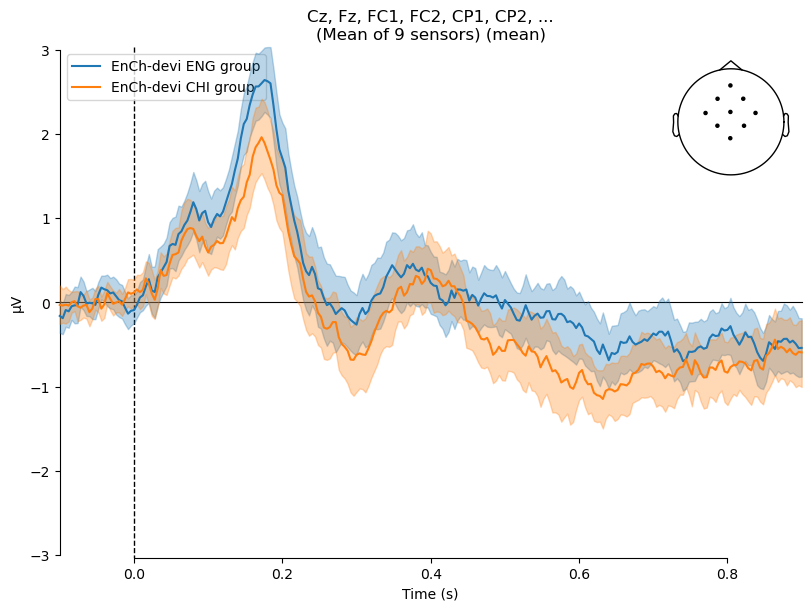

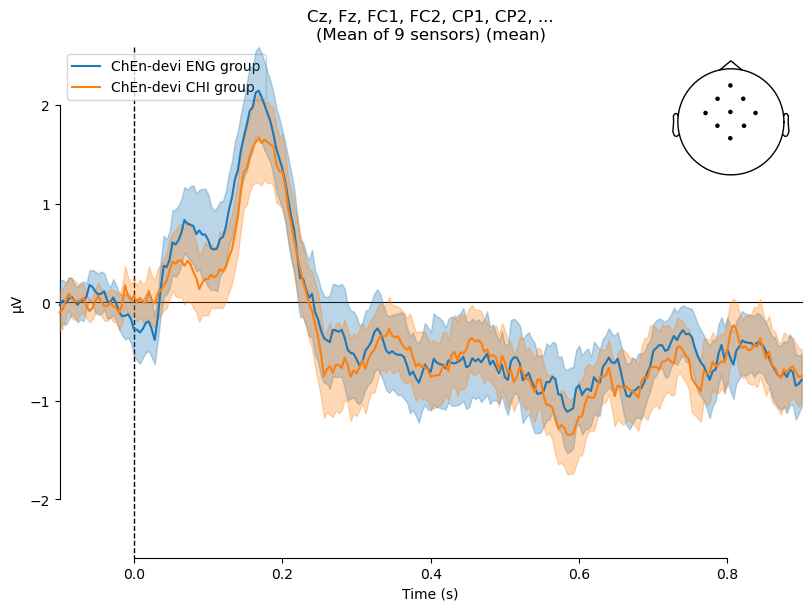

In [36]:
#### directory ####
input_dir = work_dir + 'data_preprocessed/5_evokeds/'
output_dir = work_dir + 'figures/'

# get files
all_inputs = os.listdir(input_dir)
all_outputs = os.listdir(output_dir)

def my_func_get_ppts(group):
    # get participant list
    subset_ppts = []
    for file in all_inputs:
        ppt = file.split('_')[0]
        # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
        if (ppt in ppt_dict[group]) and (ppt not in exclude_ppts):
            # append that subject to the list
            subset_ppts.append(ppt)
    return subset_ppts


pick_chans = ['Cz', 'Fz', 'FC1', 'FC2', 'CP1', 'CP2', 'C3', 'C4', 'Pz']

for condition in ['EnCh-devi', 'ChEn-devi']:

    evokeds = {}
    
    for group in ['ENG', 'CHI']:
        
        subset_ppts = my_func_get_ppts(group)
        erp = []
        for ppt in subset_ppts:
            # standard erp
            tmp_erp = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=condition, verbose='WARNING')
            # append temporary data to list
            erp.append(tmp_erp)
        
        evokeds[condition + ' ' + group + ' group'] = erp


    # plot waveforms
    mne.viz.plot_compare_evokeds(
        evokeds,
        picks=pick_chans,
        # axes=ax_signals,
        # colors=colors,
        # linestyles=linestyles,
        show_sensors=True,
        show=False,
        combine="mean",
        split_legend=True,
        truncate_yaxis="auto",
    )

In [403]:

# channel adjacency
adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')


evokeds = {}

condition='EnCh-devi'
group='ENG'
subset_ppts = my_func_get_ppts(group)
eng_erp = []
for ppt in subset_ppts:
    # standard erp
    tmp_erp = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition=condition, verbose='WARNING')
    # append temporary data to list
    eng_erp.append(tmp_erp)

evokeds[condition + ' ' + group + ' group'] = eng_erp


group='CHI'
subset_ppts = my_func_get_ppts(group)
chi_erp = []
for ppt in subset_ppts:
    # standard erp
    tmp_erp = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition=condition, verbose='WARNING')
    # append temporary data to list
    chi_erp.append(tmp_erp)


evokeds[condition + ' ' + group + ' group'] = chi_erp
    
# extract data for stats
X = np.stack([x.get_data() for x in eng_erp], axis=0)
# reshape the data for stats analysis
X1 = np.transpose(X, [0, 2, 1]) # output: participant x time x channel

# extract data for stats
X = np.stack([x.get_data() for x in chi_erp], axis=0)
# reshape the data for stats analysis
X2 = np.transpose(X, [0, 2, 1]) # output: participant x time x channel

# print(X.shape)

###################################
#### cluster-based permutation ####
###################################

# We are running an F test, so we look at the upper tail
# see also: https://stats.stackexchange.com/a/73993
tail = 1

# We want to set a critical test statistic (here: F), to determine when
# clusters are being formed. Using Scipy's percent point function of the F
# distribution, we can conveniently select a threshold that corresponds to
# some alpha level that we arbitrarily pick.
alpha_cluster_forming = 0.05

# For an F test we need the degrees of freedom for the numerator
# (number of conditions - 1) and the denominator (number of observations
# - number of conditions):
n_conditions = 2
n_observations = X1.shape[0]+X2.shape[0]
dfn = n_conditions - 1
dfd = n_observations - n_conditions

# Note: we calculate 1 - alpha_cluster_forming to get the critical value
# on the right tail
f_thresh = scipy.stats.f.ppf(1 - alpha_cluster_forming, dfn=dfn, dfd=dfd)

# run the cluster based permutation analysis
cluster_stats = mne.stats.spatio_temporal_cluster_test(
    [X1, X2],
    # n_permutations=1000,
    threshold=f_thresh,
    tail=tail,
    # n_jobs=None,
    # buffer_size=None,
    adjacency=adjacency,
    seed=42
)
F_obs, clusters, p_values, _ = cluster_stats


#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.05
good_cluster_inds = np.where(p_values < p_accept)[0]




# ################################
# #### plot gav waveform ####
# ################################

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    # get unique channel and time indices
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    
    # get topography for F stat
    f_map = F_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = evoked.times[time_inds]

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 6), layout="constrained")

    # plot topos of average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
    f_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        # cmap="jet",
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params=dict(markersize=10),
    )
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        "Averaged F-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
    )

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes("right", size="300%", pad=1.2)

    # plot waveforms
    mne.viz.plot_compare_evokeds(
        evokeds,
        picks=ch_inds,
        axes=ax_signals,
        # colors=colors,
        # linestyles=linestyles,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
        combine="mean",
    )
    

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx(
        (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
    )
    # # plot temporal cluster extent as rug markers
    # for t in sig_times:
    #     ax_signals.axvline(t, ymin=0.01, ymax=0.05, color="orange", linewidth=1)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30
stat_fun(H1): min=1.590326695321745e-08 max=15.745695910640212
Running initial clustering …
Found 59 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

# across-group MMN comparison

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


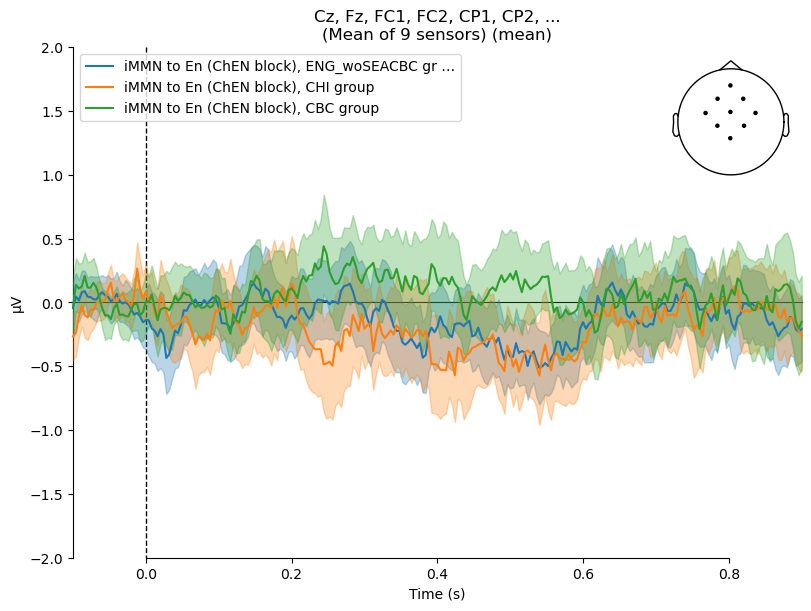

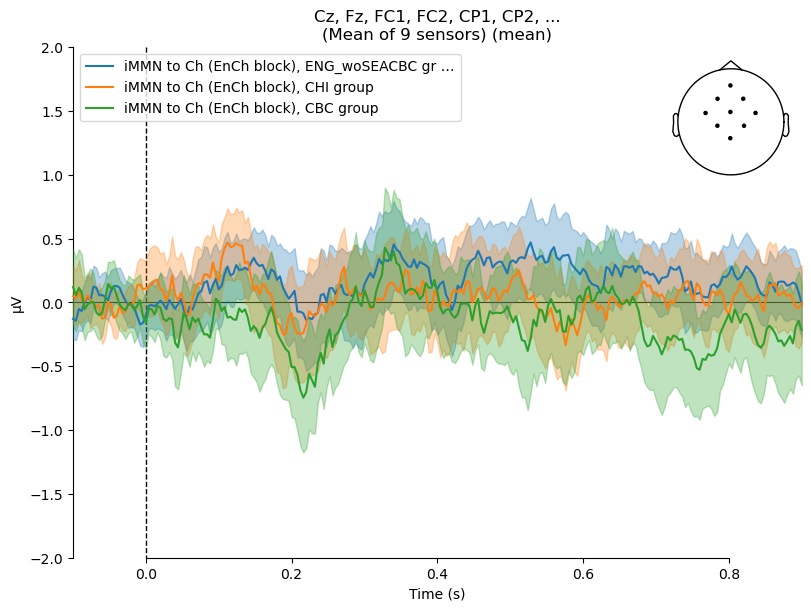

In [173]:
#### directory ####
input_dir = work_dir + 'data_preprocessed/5_evokeds/'
# output_dir = work_dir + 'figures/'

# get files
all_inputs = os.listdir(input_dir)
# all_outputs = os.listdir(output_dir)

pick_chans = ['Cz', 'Fz', 'FC1', 'FC2', 'CP1', 'CP2', 'C3', 'C4', 'Pz']

# condition = 'iMMN to En'
# cond_devi='ChEn-devi'
# cond_stan='EnCh-stan'


cond_dict = {
    'iMMN to En (ChEN block)': ['ChEn-devi', 'EnCh-stan'],
    'iMMN to Ch (EnCh block)': ['EnCh-devi', 'ChEn-stan'],
    # 'iMMN to En (InEn block)': ['InEn-devi', 'EnIn-stan'],
    # 'iMMN to In (EnIn block)': ['EnIn-devi', 'InEn-stan'],
}


for cond in cond_dict.keys():

    evokeds = {}
    
    for group in ['ENG_woSEACBC', 'CHI', 'CBC']:
        
        subset_ppts = my_func_get_ppts(group)
        
    
        erp_diff = []
        for ppt in subset_ppts:
            # deviant erp
            tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=cond_dict[cond][0], verbose='WARNING')
            # standard erp
            tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=cond_dict[cond][1], verbose='WARNING')
            # compute temporary difference erp
            tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                          weights=[1,-1])
            # append temporary data to list
            erp_diff.append(tmp_diff)
        
        evokeds[cond + ', ' + group + ' group'] = erp_diff
    
    
    # plot waveforms
    mne.viz.plot_compare_evokeds(
        evokeds,
        picks=pick_chans,
        # axes=ax_signals,
        # colors=colors,
        # linestyles=linestyles,
        show_sensors=True,
        show=False,
        combine="mean",
        split_legend=True,
        truncate_yaxis="auto",
        ylim=dict(eeg=[-2,2])
    )

In [183]:
# channel adjacency
adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')


cond_dict = {
    'iMMN to En': ['ChEn-devi', 'EnCh-stan'],
    'iMMN to Ch': ['EnCh-devi', 'ChEn-stan']
}


# cond = 'iMMN to En'
cond = 'iMMN to Ch'


evokeds = {}
stats_input = {}

group1 = 'ENG_woSEACBC'
group2 = 'CHI'
# group2 = 'CBC'


for group in [group1, group2]:
    
    subset_ppts = my_func_get_ppts(group)

    erp_diff = []
    for ppt in subset_ppts:
        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cond_dict[cond][0], verbose='WARNING')
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cond_dict[cond][1], verbose='WARNING')
        # compute temporary difference erp
        tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_diff.append(tmp_diff)

    # for plotting
    evokeds[cond + ' ' + group + ', group'] = erp_diff
    
    # extract data for stats
    X = np.stack([x.get_data() for x in erp_diff], axis=0)
    # reshape the data for stats analysis
    stats_input[group] = np.transpose(X, [0, 2, 1]) # output: participant x time x channel
    

# print(X.shape)

###################################
#### cluster-based permutation ####
###################################

# We are running an F test, so we look at the upper tail
# see also: https://stats.stackexchange.com/a/73993
tail = 1

# We want to set a critical test statistic (here: F), to determine when
# clusters are being formed. Using Scipy's percent point function of the F
# distribution, we can conveniently select a threshold that corresponds to
# some alpha level that we arbitrarily pick.
alpha_cluster_forming = 0.05

# For an F test we need the degrees of freedom for the numerator
# (number of conditions - 1) and the denominator (number of observations
# - number of conditions):
n_conditions = 2
n_observations = stats_input[group1].shape[0] + stats_input[group2].shape[0]
dfn = n_conditions - 1
dfd = n_observations - n_conditions

# Note: we calculate 1 - alpha_cluster_forming to get the critical value
# on the right tail
f_thresh = scipy.stats.f.ppf(1 - alpha_cluster_forming, dfn=dfn, dfd=dfd)

# run the cluster based permutation analysis
cluster_stats = mne.stats.spatio_temporal_cluster_test(
    [stats_input[group1], stats_input[group2]],
    # n_permutations=1000,
    threshold=f_thresh,
    tail=tail,
    # n_jobs=None,
    # buffer_size=None,
    adjacency=adjacency,
    seed=42
)
F_obs, clusters, p_values, _ = cluster_stats


#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.05
good_cluster_inds = np.where(p_values < p_accept)[0]



print('===== ' + cond + ' significant clusters =====')
print(good_clusters_idx)


# ################################
# #### plot gav waveform ####
# ################################

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    # get unique channel and time indices
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    
    # get topography for F stat
    f_map = F_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = evoked.times[time_inds]

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 6), layout="constrained")

    # plot topos of average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
    f_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        # cmap="jet",
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params=dict(markersize=10),
    )
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        "Averaged F-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
    )

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes("right", size="300%", pad=1.2)

    # plot waveforms
    mne.viz.plot_compare_evokeds(
        evokeds,
        picks=ch_inds,
        axes=ax_signals,
        # colors=colors,
        # linestyles=linestyles,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
        combine="mean",
    )
    

    # plot temporal cluster extent
    # plot temporal cluster extent as rug markers
    for t in sig_times:
        ax_signals.axvline(t, ymin=0.01, ymax=0.05, color="black", linewidth=1)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30
stat_fun(H1): min=7.662756292800028e-11 max=10.792238248284
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== iMMN to Ch significant clusters =====
[]


# within-group iMMN comparison

combining channels using "mean"
combining channels using "mean"
stat_fun(H1): min=-4.890736909603604 max=4.263040738856637
Running initial clustering …
Found 93 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CHI significant clusters =====
[68]
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
stat_fun(H1): min=-4.08569050932997 max=4.061631725404466
Running initial clustering …
Found 82 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== CBC significant clusters =====
[]
combining channels using "mean"
combining channels using "mean"
stat_fun(H1): min=-5.211525434915039 max=5.149387850998514
Running initial clustering …
Found 94 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

===== ENG_woCBC significant clusters =====
[64]
combining channels using "mean"
combining channels using "mean"


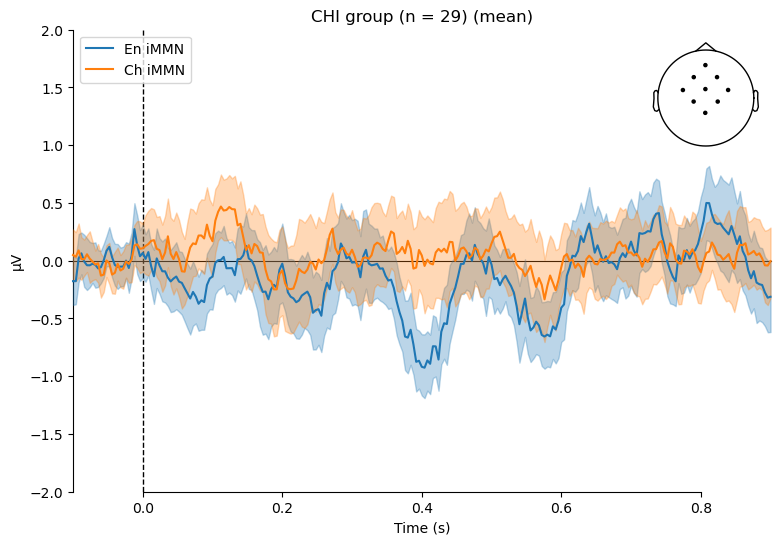

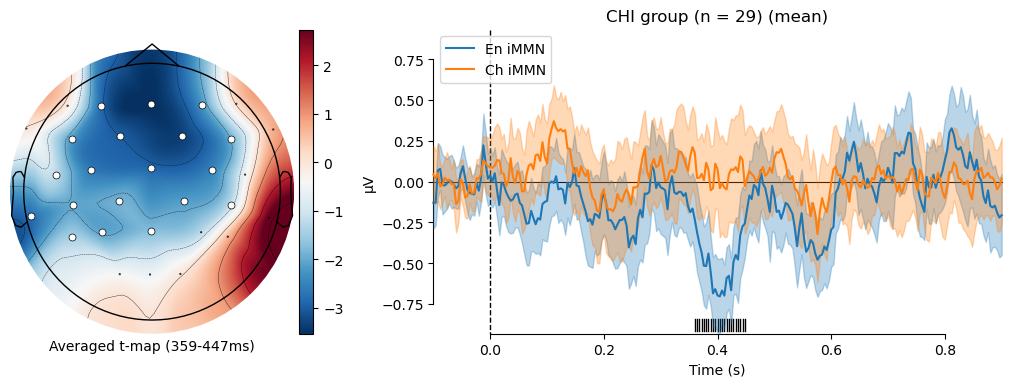

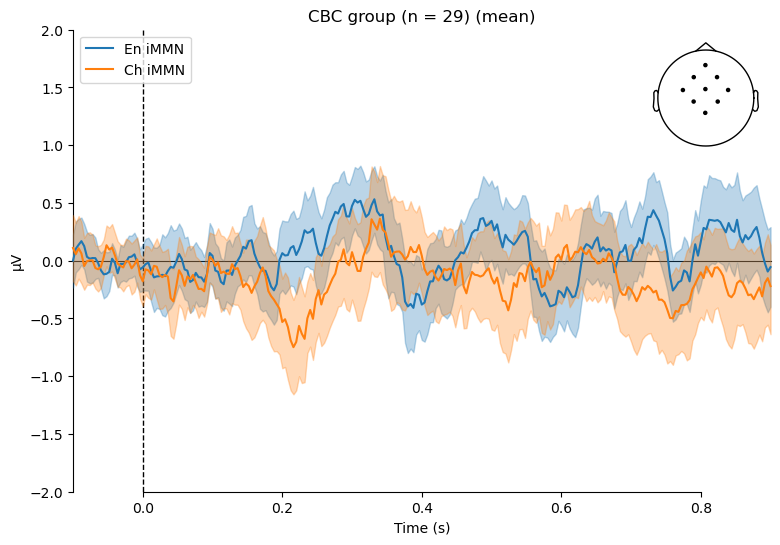

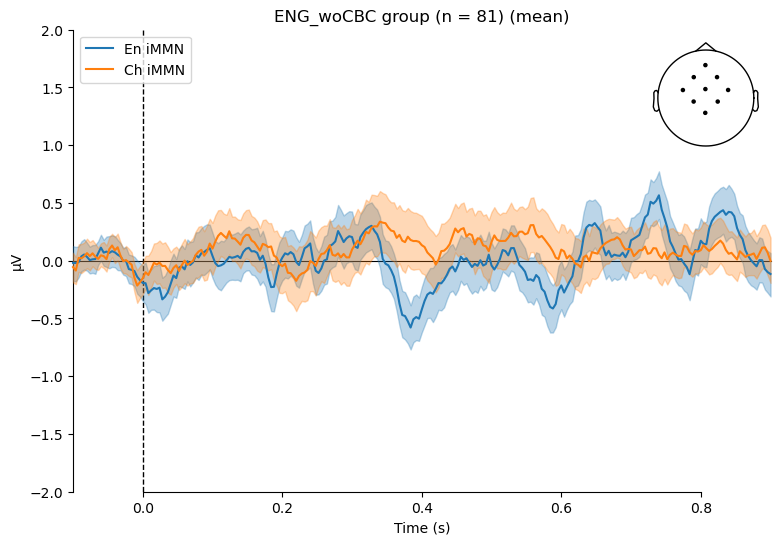

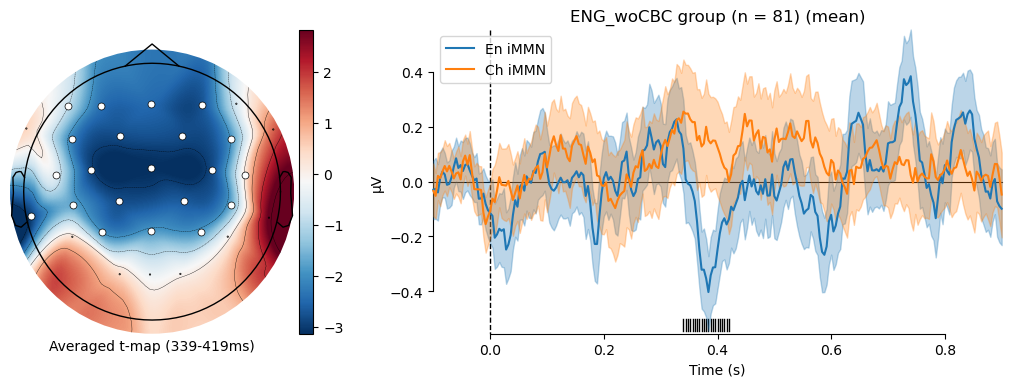

In [65]:
exclude_ppts = [
    '137',
]

# for each group
for group in ppt_dict.keys():

    subset_ppts = my_func_get_ppts(group)
        
    # get legends
    legend_En = 'En iMMN'
    legend_Ch = 'Ch iMMN'
    
    # initialize list
    erp_En = []
    erp_Ch = []
    erp_diff = []

    # for each subject
    for ppt in subset_ppts:

        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition='ChEn-devi', verbose='WARNING')
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition='ChEn-stan', verbose='WARNING')
        # compute temporary difference erp
        tmp_en_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_En.append(tmp_en_diff)

        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition='EnCh-devi', verbose='WARNING')
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition='ChEn-stan', verbose='WARNING')
        # compute temporary difference erp
        tmp_ch_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_Ch.append(tmp_ch_diff)

        # difference of difference
        tmp_mmn_diff = mne.combine_evoked([tmp_en_diff, tmp_ch_diff],
                                      weights=[1,-1])
        erp_diff.append(tmp_mmn_diff)

    
        
    #### combine data for plotting ####
    evokeds = {}
    evokeds[legend_En] = erp_En
    evokeds[legend_Ch] = erp_Ch
    
    
    # ################################
    # #### plot gav waveform ####
    # ################################
    
    # figure title for the waveform
    waveform_title = group + ' group (n = ' + str(len(subset_ppts)) + ')'

    wave, ax = plt.subplots(1, 1, figsize=(9, 6))
    
    mne.viz.plot_compare_evokeds(
        evokeds,
        axes=ax,
        picks=pick_chans,
        combine="mean",
        show_sensors=True,
        # colors=colors,
        title = waveform_title,
        ylim=dict(eeg=[-2, 2]),
        time_unit="s",
        show=False
    )


    
    # print(X.shape)
    
    ###################################
    #### cluster-based permutation ####
    ###################################

        
    # extract data for stats
    X = np.stack([x.get_data() for x in erp_diff], axis=0)
    # reshape the data for stats analysis
    X = np.transpose(X, [0, 2, 1]) # output: participant x time x channel
    
    # Here we set a cluster forming threshold based on a p-value for
    # the cluster based permutation test.
    # We use a two-tailed threshold, the "1 - p_threshold" is needed
    # because for two-tailed tests we must specify a positive threshold.
    p_thresh = 0.05  # arbitrary
    n_observations = X.shape[0]
    df = n_observations - 1  # degrees of freedom for the test
    
    # two-tailed test
    tail = 0
    t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df)
    
    # one tail, 1 for higher tail, -1 for lower tail
    # tail = -1
    # t_thresh = scipy.stats.t.ppf(p_thresh, df)
    
    
    # Run the analysis
    T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X,
        adjacency=adjacency,
        threshold=t_thresh,
        tail=tail,
        # out_type="mask",
        seed = 42 # set random seed
    )
    
    #########################
    #### select clusters ####
    #########################
    
    # Select the clusters that are statistically significant at p < 0.05
    p_accept = 0.05
    good_clusters_idx = np.where(cluster_p_values < p_accept)[0]
    
    print('===== ' + group + ' significant clusters =====')
    print(good_clusters_idx)    

    if len(good_clusters_idx) > 0:
            
        # loop over clusters
        for ith_cluster in range(len(good_clusters_idx)):
            # unpack cluster information, get unique indices
            time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[ith_cluster]])
    
            # get unique channel and time indices
            ch_inds = np.unique(space_inds)
            time_inds = np.unique(time_inds)             
            
            # get topography for F stat
            t_map = T_obs[time_inds, ...].mean(axis=0)
    
            # get signals at the sensors contributing to the cluster
            sig_times = evoked.times[time_inds]
    
            # create spatial mask
            mask = np.zeros((t_map.shape[0], 1), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
            mask[ch_inds, :] = True
    
            # initialize figure
            fig, ax_topo = plt.subplots(1, 1, figsize=(10, 6), layout="constrained")
    
            # plot topos of average test statistic and mark significant sensors
            t_evoked = mne.EvokedArray(t_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
            t_evoked.plot_topomap(
                times=0,
                mask=mask,
                axes=ax_topo,
                # cmap="jet",
                vlim=(np.min, np.max),
                show=False,
                colorbar=False,
                mask_params=dict(markersize=10),
            )
            image = ax_topo.images[0]
    
            # remove the title that would otherwise say "0.000 s"
            ax_topo.set_title("")
    
            # create additional axes (for ERF and colorbar)
            divider = make_axes_locatable(ax_topo)
    
            # add axes for colorbar
            ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(image, cax=ax_colorbar)
            ax_topo.set_xlabel(
                "Averaged t-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
            )
    
            # add new axis for time courses and plot time courses
            ax_signals = divider.append_axes("right", size="200%", pad=1.2)
    
            # plot waveforms
            mne.viz.plot_compare_evokeds(
                evokeds,
                title=waveform_title,
                picks=ch_inds,
                axes=ax_signals,
                # colors=colors,
                # linestyles=linestyles,
                show=False,
                split_legend=True,
                truncate_yaxis="auto",
                combine="mean",
            )
            
    
            # plot temporal cluster extent
            for t in sig_times:
                ax_signals.axvline(t, ymin=0.01, ymax=0.05, color="black", linewidth=1)
    
            # save
            if toggle_save_plot:
                fig.savefig(output_dir + 'erp_permutation_' + group + '_' + mmn + '.png')

In [ ]:
############################
#### Parameters ############
############################


# create a dictionary for condition key and standard and deviant cells ####
cell_dict = {
    'identityMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'EnCh-stan', 'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'ChEn-stan', 'devi_stim': 'Chinese', 'stan_stim': 'Chinese'},
    'identityMMN_English_in_Indian': {'deviant': 'InEn-devi', 'standard': 'EnIn-stan',  'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Indian_in_English': {'deviant': 'EnIn-devi', 'standard': 'InEn-stan',  'devi_stim': 'Indian', 'stan_stim': 'Indian'},
    # 'withinBlockMMN_English_in_Chinese': {'deviant': 'ChEn-devi', 'standard': 'ChEn-stan', 'devi_stim': 'English', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Chinese_in_English': {'deviant': 'EnCh-devi', 'standard': 'EnCh-stan', 'devi_stim': 'Chinese', 'stan_stim': 'English'},
}



# participants to exclude
exclude_ppts = []

# channel adjacency
adjacency, chan_names = mne.channels.find_ch_adjacency(evoked.info, 'eeg')

######### function ##########
def my_permutation_func(group, mmn):
    
    # extract ERPs for each condition
    erp_diff = []
    
    # for each participant
    for ppt in subset_ppts:
    
        # standard erp
        tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[mmn]['standard'], verbose='WARNING')
        # deviant erp
        tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                condition=cell_dict[mmn]['deviant'], verbose='WARNING')
        # compute temporary difference erp
        tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                      weights=[1,-1])
        # append temporary data to list
        erp_diff.append(tmp_diff)
    
        del tmp_stan, tmp_devi, tmp_diff
        
    
    # extract data for stats
    X = np.stack([x.get_data() for x in erp_diff], axis=0)
    # reshape the data for stats analysis
    X = np.transpose(X, [0, 2, 1]) # output: participant x time x channel
    
    # print(X.shape)
    
    ###################################
    #### cluster-based permutation ####
    ###################################
    
    # Here we set a cluster forming threshold based on a p-value for
    # the cluster based permutation test.
    # We use a two-tailed threshold, the "1 - p_threshold" is needed
    # because for two-tailed tests we must specify a positive threshold.
    p_thresh = 0.05  # arbitrary
    n_observations = X.shape[0]
    df = n_observations - 1  # degrees of freedom for the test
    
    # two-tailed test
    # tail = 0
    # t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df)
    
    # one tail, 1 for higher tail, -1 for lower tail
    tail = -1
    t_thresh = scipy.stats.t.ppf(p_thresh, df)
    
    
    # Run the analysis
    T_obs, clusters, cluster_p_values, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X,
        adjacency=adjacency,
        threshold=t_thresh,
        tail=tail,
        # out_type="mask",
        seed = 42 # set random seed
    )
    
    #########################
    #### select clusters ####
    #########################
    
    # Select the clusters that are statistically significant at p < 0.05
    p_accept = 0.05
    good_clusters_idx = np.where(cluster_p_values < p_accept)[0]
    
    print('===== ' + group + ' ' + mmn + ' significant clusters =====')
    print(good_clusters_idx)

    return subset_ppts, good_clusters_idx, clusters, T_obs
            

# # visualize
# mne.viz.plot_ch_adjacency(evoked.info, chan_adj, chan_names)
# plt.show()
for group in ppt_dict.keys():
    for mmn in cell_dict.keys():

        # get participant list
        subset_ppts = []
        for file in all_inputs:
            ppt = file.split('_')[0]
            # if (ppt in ppt_dict[ppt_group]) and (ppt not in exclude_ppts) and (ppt not in subset_ppts):
            if (ppt in ppt_dict[group]) and (ppt not in exclude_ppts):
                # append that subject to the list
                subset_ppts.append(ppt)

        # apply function
        subset_ppts, good_clusters_idx, clusters, T_obs = my_permutation_func(group,  mmn)
        
        ## visualize clusters

        #######################
        #### visualization ####
        #######################
        
        #### parameter ####
        toggle_save_plot = True
        
        # get legends
        legend_stan = 'standard (' + cell_dict[mmn]['stan_stim'] + ' from ' + cell_dict[mmn]['standard'] + ')'
        legend_devi = 'deviant (' + cell_dict[mmn]['devi_stim'] + ' from ' + cell_dict[mmn]['deviant'] + ')'
        legend_diff = 'deviants minus standards'
        
        # title
        permutation_wave_title = group + ' (n = ' + str(len(subset_ppts)) + ')'
        
        # extract ERPs for each condition
        erp_stan = []
        erp_devi = []
        
        # for each participant
        for ppt in subset_ppts:
        
            # standard erp
            tmp_stan = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                        condition=cell_dict[mmn]['standard'], verbose='WARNING')
            # deviant erp
            tmp_devi = mne.read_evokeds(input_dir + ppt + '_ave.fif', 
                                    condition=cell_dict[mmn]['deviant'], verbose='WARNING')
            # compute temporary difference erp
            tmp_diff = mne.combine_evoked([tmp_devi, tmp_stan],
                                          weights=[1,-1])
            # append temporary data to list
            erp_stan.append(tmp_stan)
            erp_devi.append(tmp_devi)
    
            # organize data for plotting
            evokeds = {
                legend_stan: erp_stan,
                legend_devi: erp_devi,
            }
        
            del tmp_stan, tmp_devi, tmp_diff
        
        if len(good_clusters_idx) > 0:
                    
            # loop over clusters
            for ith_cluster in range(len(good_clusters_idx)):
                # unpack cluster information, get unique indices
                time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[ith_cluster]])
        
                # get unique channel and time indices
                ch_inds = np.unique(space_inds)
                time_inds = np.unique(time_inds)             
                
                # get topography for F stat
                t_map = T_obs[time_inds, ...].mean(axis=0)
        
                # get signals at the sensors contributing to the cluster
                sig_times = evoked.times[time_inds]
        
                # create spatial mask
                mask = np.zeros((t_map.shape[0], 1), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
                mask[ch_inds, :] = True
        
                # initialize figure
                fig, ax_topo = plt.subplots(1, 1, figsize=(10, 6), layout="constrained")
        
                # plot topos of average test statistic and mark significant sensors
                t_evoked = mne.EvokedArray(t_map[:, np.newaxis]/1e6, evoked.info, tmin=0)
                t_evoked.plot_topomap(
                    times=0,
                    mask=mask,
                    axes=ax_topo,
                    # cmap="jet",
                    vlim=(np.min, np.max),
                    show=False,
                    colorbar=False,
                    mask_params=dict(markersize=10),
                )
                image = ax_topo.images[0]
        
                # remove the title that would otherwise say "0.000 s"
                ax_topo.set_title("")
        
                # create additional axes (for ERF and colorbar)
                divider = make_axes_locatable(ax_topo)
        
                # add axes for colorbar
                ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
                plt.colorbar(image, cax=ax_colorbar)
                ax_topo.set_xlabel(
                    "Averaged t-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
                )
        
                # add new axis for time courses and plot time courses
                ax_signals = divider.append_axes("right", size="300%", pad=1.2)
        
                # plot waveforms
                mne.viz.plot_compare_evokeds(
                    evokeds,
                    title=permutation_wave_title,
                    picks=ch_inds,
                    axes=ax_signals,
                    # colors=colors,
                    # linestyles=linestyles,
                    show=False,
                    split_legend=True,
                    truncate_yaxis="auto",
                    combine="mean",
                )
                
        
                # plot temporal cluster extent
                for t in sig_times:
                    ax_signals.axvline(t, ymin=0.01, ymax=0.05, color="black", linewidth=1)
        
                # save
                if toggle_save_plot:
                    fig.savefig(output_dir + 'erp_permutation_' + group + '_' + mmn + '.png')

# Visualization, waveform + t-map, for poster

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


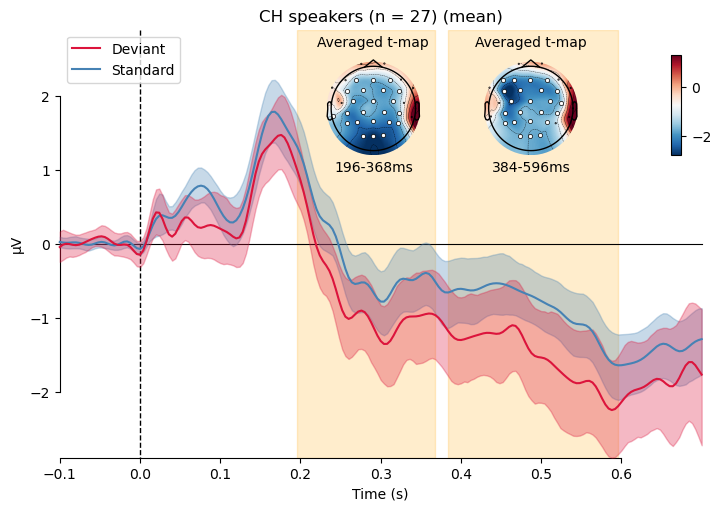

In [89]:
#######################
#### visualization, waveform + t-map, for poster ####
#######################

#### parameter ####
toggle_save_plot = True

# pick_chans = ['Cz']

# title
permutation_wave_title = subj_group + ' (n = ' + str(len(subset_subs)) + ')'

# What legend do you want to give to each type of stimuli? It shows in plots
legend_devi = 'Deviant'
legend_stan = 'Standard'




#### prepare data for waveform plotting ####
stan_data = [stan_dict[k] for k in stan_dict.keys()]
devi_data = [devi_dict[k] for k in devi_dict.keys()]

# organize data for plotting
evokeds = {
    legend_stan: stan_data,
    legend_devi: devi_data,
}


#### prepare data for topo plotting ####

# create a list of grand average differences
erp_diff_list = list(erp_diff.values())

grand_avg_diff = mne.grand_average(erp_diff_list)


## visualize clusters

if len(good_clusters_idx) > 0:
    
    # configure variables for visualization
    colors = {legend_devi: "crimson", legend_stan: "steelblue"}
    # linestyles = {"ChEn_d": "-", "ChEn_s": "--"}

    # loop over clusters
    for i_clu in range(len(good_clusters_idx)):
        # unpack cluster information, get unique indices
        time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[i_clu]])

        # get channel indices
        ch_inds = np.unique(space_inds)
        # convert it to panda dataframe and save as .txt
        # df = pd.DataFrame(ch_inds+1)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        # get time indices
        time_inds = np.unique(time_inds)
        # # convert it to panda dataframe and save as .txt
        # df = pd.DataFrame(time_inds+1)
        # # df.to_csv('input/stats_time_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_time_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        
        # get topography for F stat
        t_map = T_obs[time_inds, ...].mean(axis=0)/1e6

        # get signals at the sensors contributing to the cluster
        sig_times = epoch_info.times[time_inds]

        # create spatial mask
        mask = np.zeros((t_map.shape[0], 1), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
        mask[ch_inds, :] = True

        # initialize figure
        if i_clu==0:
            fig, ax_wave = plt.subplots(1, 1, figsize=(7, 5), layout="constrained")
            
            # plot waveforms
            plot_compare_evokeds(
                evokeds,
                title=permutation_wave_title,
                picks=ch_inds,
                axes=ax_wave,
                colors=colors,
                # linestyles=linestyles,
                show=False,
                split_legend=True,
                truncate_yaxis="auto",
                combine="mean",
            )
        

            # plot temporal cluster extent
            ymin, ymax = ax_wave.get_ylim()
            ax_wave.fill_betweenx(
                (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.2
            )

        # for the 2nd cluster of CH group
        else:
            ax_wave.fill_betweenx(
                (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.2
            )


        #### plotting topo of tmap ####

        # position for tmap topo
        if subj_group == 'CH speakers':
            if i_clu==0:
                ax_topo = fig.add_axes([0.425, 0.7, 0.2, 0.2]) # topo position for CH speaker cluster 1
                # Position for the colorbar
                cbar_ax = fig.add_axes([0.95, 0.7, 0.015, 0.2])
            else:
                ax_topo = fig.add_axes([0.65, 0.7, 0.2, 0.2])
        else:
            ax_topo = fig.add_axes([0.57, 0.7, 0.2, 0.2]) # topo position for EN speaker
            # Position for the colorbar
            cbar_ax = fig.add_axes([0.95, 0.7, 0.015, 0.2])



        # plot topos of average test statistic and mark significant sensors
        t_evoked = mne.EvokedArray(t_map[:, np.newaxis], epoch_info.info, tmin=0)
        t_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            # cmap="jet",
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params=dict(markersize=6),
        )

        # ax_topo.set_title("Your Title", fontsize=14)
        ax_topo.set_title('Averaged t-map', fontsize=10)

        ax_topo.set_xlabel(
            "{:}-{:}ms".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
        )
        
        # add colorbar
        if i_clu == 0:
            image = ax_topo.images[0]
            plt.colorbar(image, cax=cbar_ax)
            cbar_ax.tick_params(labelsize=10)
            cbar_ax.yaxis.get_offset_text().set_fontsize(10)

    

        
        # save fig
        if toggle_save_plot:
            fig.savefig(output_dir + 'permutation_waveform+t-map_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '.png', bbox_inches='tight')
    
    

# Time-frequency plotting

Identifying common channels ...
No baseline correction applied


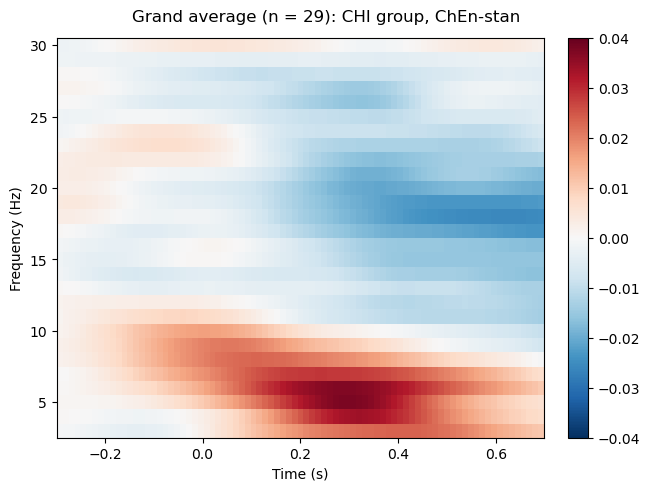

Identifying common channels ...
No baseline correction applied


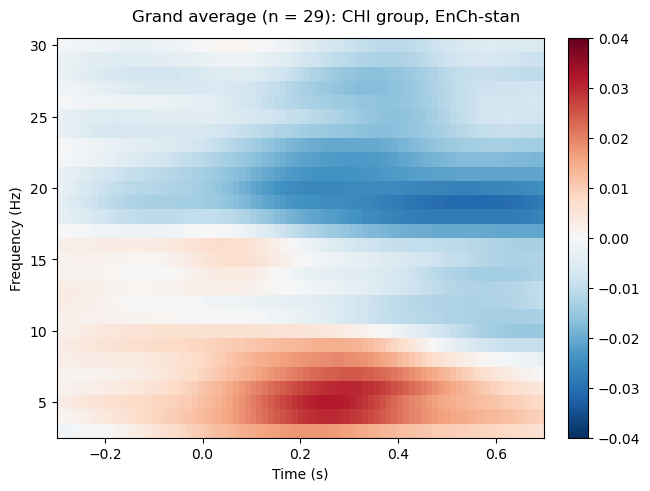

Identifying common channels ...
No baseline correction applied


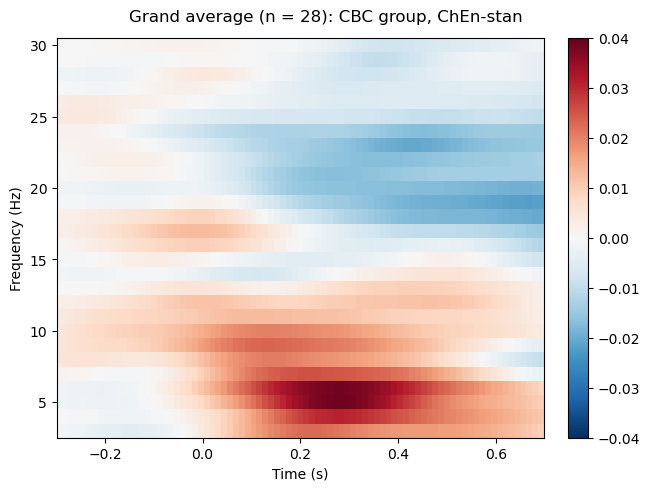

Identifying common channels ...
No baseline correction applied


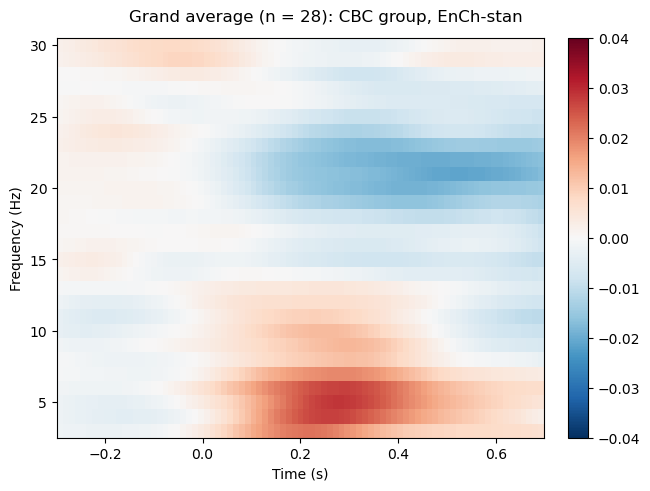

Identifying common channels ...
No baseline correction applied


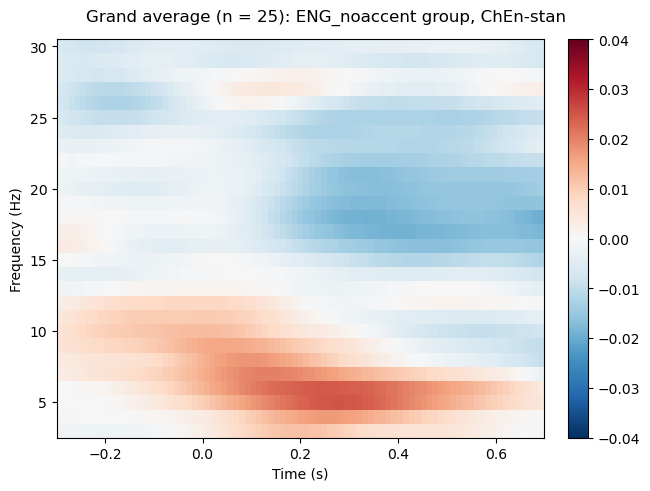

Identifying common channels ...
No baseline correction applied


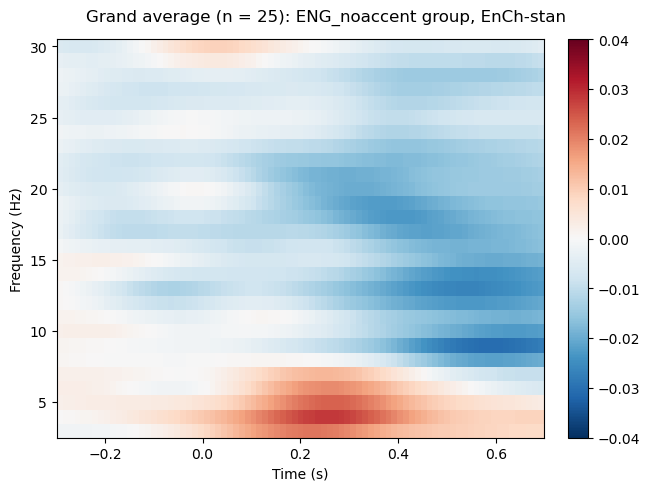

In [132]:
# grand average
toggle_save_plot = False

# directory
input_dir = work_dir + 'data_preprocessed/4_tfr_evokeds_unnormalized/'
output_dir = work_dir + 'figures/tfr/'
# create a folder if the folder doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# baseline
tfr_baseline = (-0.45, -0.3)

# condition list
condition_list = ['ChEn-stan', 'EnCh-stan']
# condition_list = ['ChEn-stan', 'EnCh-stan', 'ChEn-devi', 'EnCh-devi']


# get file names
all_input = os.listdir(input_dir)


# for each group
for group in ppt_dict.keys():


    # for each condition
    for condition in condition_list:
        
        # initialize ERSP list
        tfrs = []

        for file in all_input:
    
            if file.endswith("tfr.hdf5") and (file.split('_')[0] in ppt_dict[group]):

                # exclude bad data
                if file.split('_')[0] in exclude_ppts:
                    continue
                
                # read in data
                power = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=condition, verbose='WARNING')

                # normalization
                power.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')

                # append
                tfrs.append(power)

        # create a list of grand average differences
        tfrs = mne.grand_average(tfrs)

        # power
        fig = tfrs.plot(
            # picks='all', 
            combine = 'mean',
            tmin=-0.3, tmax=0.7,
            title= tfrs.comment + ': ' + group + ' group, ' + condition,
            vlim = (-0.04, 0.04)
        )
        
        # save fig
        if toggle_save_plot:
            fig[0].savefig(output_dir + 'power_' + group + '_' + condition +'.png')

        # release memory
        del tfrs

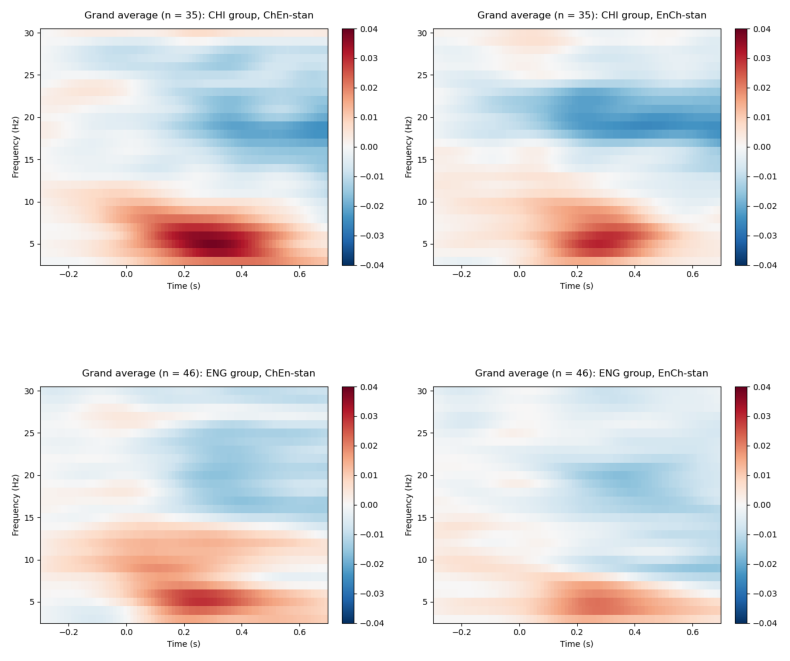

In [133]:
# combine figures
input_dir = work_dir + 'figures/tfr/'
output_dir = work_dir + 'figures/tfr/'


###############
image_files = [
    'power_CHI_ChEn-stan.png', 
    'power_CHI_EnCh-stan.png', 
    'power_ENG_ChEn-stan.png', 
    'power_ENG_EnCh-stan.png',
]

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through images and add them as subplots
for ax, img_path in zip(axes, image_files):
    img = mpimg.imread(input_dir + img_path)  # Read image
    ax.imshow(img)  # Display image
    ax.axis("off")  # Hide axis

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig(output_dir + 'power_combined.png', dpi=300, bbox_inches='tight')
############################

# Cluter-based permutation analysis of time frequency

In [295]:
# grand average

# directory
input_dir = work_dir + 'data_preprocessed/4_tfr_evokeds_unnormalized/'
output_dir = work_dir + 'data_analysis/'
# create a folder if the folder doesn't exist
# os.makedirs(output_dir, exist_ok=True)

tfr_evoked = mne.time_frequency.read_tfrs(fname=input_dir + '100_tfr.hdf5')[0]
tfr_evoked = tfr_evoked.crop(-0.3, 0.7)
# find_ch_adjacency first attempts to find an existing "neighbor"
# (adjacency) file for given sensor layout.
# If such a file doesn't exist, an adjacency matrix is computed on the fly,
# using Delaunay triangulations.
sensor_adjacency, ch_names = mne.channels.find_ch_adjacency(tfr_evoked.info, ch_type='eeg')

# # visualize
# mne.viz.plot_ch_adjacency(evoked.info, sensor_adjacency, ch_names)
# plt.show()
                                                            
adjacency = mne.stats.combine_adjacency(
    sensor_adjacency, len(tfr_evoked.freqs), len(tfr_evoked.times)
)
# The overall adjacency we end up with is a square matrix with each
# dimension matching the data size (excluding observations) in an
# "unrolled" format, so: len(channels × frequencies × times)


# baseline
tfr_baseline = (-0.4, -0.3)

# condition_list = ['ChEn-stan', 'ChEn-devi', 'EnCh-stan', 'EnCh-devi']

# get file names
all_input = os.listdir(input_dir)

# for each group
# ['ENG_woSEACBC', 'CHI', 'SEA', 'CBC', 'ENG_noaccent']
group = 'CHI'

cond1 = 'ChEn-stan'
cond2 = 'EnCh-stan'



# initialize ERSP list
tfrs = []

for file in all_input:

    if file.endswith("_tfr.hdf5") and (file.split('_')[0] in ppt_dict[group]):

        # exclude bad data
        if file.split('_')[0] in exclude_ppts:
            continue
        
        # read in data
        power1 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond1, verbose='WARNING')
        power2 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond2, verbose='WARNING')
        # Baseline power
        power1.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')       
        power2.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')        
        power_diff = power1 - power2

        # crop
        power_diff.crop(-0.3, 0.7)

        # append
        tfrs.append(power_diff)

        # release memory
        del power1, power2, power_diff



####### compute adjacency ######
tfr_evoked = tfrs[0]

# extract data for stats
X = [x.data for x in tfrs]
X = np.stack(X, axis=0)
# X.shape # observation x channel x frequency x time


# In this example, we wish to set the threshold for including data bins in
# the cluster forming process to the t-value corresponding to p=0.001 for the
# given data.
#
# Because we conduct a two-tailed test, we divide the p-value by 2 (which means
# we're making use of both tails of the distribution).
# As the degrees of freedom, we specify the number of observations
# (here: epochs) minus 1.
# Finally, we subtract 0.001 / 2 from 1, to get the critical t-value
# on the right tail (this is needed for MNE-Python internals)
tail = 0
p_thresh = 0.05
degrees_of_freedom = X.shape[0] - 1
t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df=degrees_of_freedom)


# Run the analysis
T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(
    X,
    threshold=t_thresh,
    tail=tail,
    adjacency=adjacency,
    out_type="mask",
    # seed = 42,
    verbose=True,
)

#########################
#### select clusters ####
#########################

# Select the clusters that are statistically significant at p < 0.05
p_accept = 0.05
good_clusters_idx = np.where(cluster_p_values < p_accept)[0]

print('==== ' + group + ' group: ' + cond1 + ' minus ' + cond2 + ', Significant Clusters ====')
print(good_clusters_idx)

# plot
if len(good_clusters_idx)>0:
    times = tfr_evoked.times
    freqs = tfr_evoked.freqs
    fig, ax = plt.subplots(1, layout="constrained")
    
    T_obs_plot = np.nan * np.ones_like(T_obs)
    for c, p_val in zip(clusters, cluster_p_values):
        if p_val <= p_accept:
            T_obs_plot[c] = T_obs[c]
    
    # Just plot one channel's data
    # use the following to show a specific one:
    # ch_idx = tfr_epochs.ch_names.index('MEG 1332')
    ch_idx, f_idx, t_idx = np.unravel_index(
        np.nanargmax(np.abs(T_obs_plot)), X.shape[1:]
    )
    
    vmax = np.max(np.abs(T_obs))
    vmin = -vmax
    ax.imshow(
        T_obs[ch_idx],
        cmap=plt.cm.grey,
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        vmin=vmin,
        vmax=vmax,
    )
    ax.imshow(
        T_obs_plot[ch_idx],
        # cmap=plt.cm.RdBu,
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect="auto",
        origin="lower",
        vmin=vmin,
        vmax=vmax,
    )
    fig.colorbar(ax.images[1])
    
    ax.set_title(group + ' group: ' + cond1 + ' minus ' + cond2)
    ax.set(xlabel="Time (s)", ylabel="Frequency (Hz)")
    # ax.set(title=f"Induced power ({tfr_epochs.ch_names[ch_idx]})")
    
    # evoked.plot(axes=[ax2], time_unit="s")

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/4_tfr_evokeds_unnormalized/100_tfr.hdf5 ...
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30
stat_fun(H1): min=-3.928989866947472 max=4.1797533712383
Running initial clustering …
Found 66 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-stan minus EnCh-stan, Significant Clusters ====
[]


# By-channel Cluter-based permutation analysis of time frequency

In [131]:
# grand average

# directory
input_dir = work_dir + 'data_preprocessed/4_tfr_evokeds_unnormalized/'
output_dir = work_dir + 'data_analysis/'
# create a folder if the folder doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# baseline
tfr_baseline = (-0.45, -0.3)

# condition_list = ['ChEn-stan', 'ChEn-devi', 'EnCh-stan', 'EnCh-devi']

# get file names
all_input = os.listdir(input_dir)

group = 'ENG'
# condition = 'ChEn-stan'
# condition = 'EnCh-stan'

# for each group
group_list = ['ENG', 'CHI', 'SOME']

cond1_list = [
    'ChEn-devi',
    'EnCh-devi',
]
cond2_list = [
    'ChEn-stan',
    'EnCh-stan',
]


for group in group_list:
    for cond1 in cond1_list:
        for cond2 in cond2_list:
            for chan in channels:
                # initialize ERSP list
                tfrs = []
                
                for file in all_input:
                
                    if file.endswith("_tfr.hdf5") and (file.split('_')[0] in ppt_dict[group]):
                
                        # exclude bad data
                        if file.split('_')[0] in exclude_ppts:
                            continue
                        
                        # read in data
                        power1 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond1, verbose='WARNING')
                        power2 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond2, verbose='WARNING')
                        # Baseline power
                        power1.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')       
                        power2.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')        
                        power_diff = power1.pick(chan) - power2.pick(chan)
                
                        # crop
                        power_diff.crop(-0.3, 0.7)
                
                        # append
                        tfrs.append(power_diff)
                
                        # release memory
                        del power1, power2, power_diff
                
    
    
                ####### compute adjacency ######
                tfr_evoked = tfrs[0]
                # find_ch_adjacency first attempts to find an existing "neighbor"
                # (adjacency) file for given sensor layout.
                # If such a file doesn't exist, an adjacency matrix is computed on the fly,
                # using Delaunay triangulations.
                # sensor_adjacency, ch_names = mne.channels.find_ch_adjacency(tfr_evoked.info, ch_type='eeg')
                
                # # visualize
                # mne.viz.plot_ch_adjacency(evoked.info, sensor_adjacency, ch_names)
                # plt.show()
                                                                            
                adjacency = mne.stats.combine_adjacency(
                    len(tfr_evoked.freqs), len(tfr_evoked.times)
                )
                # The overall adjacency we end up with is a square matrix with each
                # dimension matching the data size (excluding observations) in an
                # "unrolled" format, so: len(channels × frequencies × times)
                
                # extract data for stats
                X = [x.data for x in tfrs]
                X = np.stack(X, axis=0)
                X = X.squeeze()
                # X.shape # observation x channel x frequency x time
                
                
                # In this example, we wish to set the threshold for including data bins in
                # the cluster forming process to the t-value corresponding to p=0.001 for the
                # given data.
                #
                # Because we conduct a two-tailed test, we divide the p-value by 2 (which means
                # we're making use of both tails of the distribution).
                # As the degrees of freedom, we specify the number of observations
                # (here: epochs) minus 1.
                # Finally, we subtract 0.001 / 2 from 1, to get the critical t-value
                # on the right tail (this is needed for MNE-Python internals)
                tail = 0
                p_thresh = 0.05
                degrees_of_freedom = X.shape[0] - 1
                t_thresh = scipy.stats.t.ppf(1 - p_thresh / 2, df=degrees_of_freedom)
                
                
                # Run the analysis
                T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(
                    X,
                    threshold=t_thresh,
                    tail=tail,
                    adjacency=adjacency,
                    out_type="mask",
                    seed = 42,
                    verbose=True,
                )
                
                #########################
                #### select clusters ####
                #########################
                
                # Select the clusters that are statistically significant at p < 0.05
                p_accept = 0.05
                good_clusters_idx = np.where(cluster_p_values < p_accept)[0]
                
                print('==== ' + group + ' group: ' + cond1 + ' minus ' + cond2 + ' ' + chan + ', Significant Clusters ====')
                print(good_clusters_idx)

stat_fun(H1): min=-4.192580297359578 max=2.4637909951831
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan Fz, Significant Clusters ====
[]
stat_fun(H1): min=-3.047757406788005 max=3.9196404920707937
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan F3, Significant Clusters ====
[]
stat_fun(H1): min=-2.182667101323647 max=3.154502357645161
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan F7, Significant Clusters ====
[]
stat_fun(H1): min=-3.494556979608188 max=2.7648941723817404
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FT9, Significant Clusters ====
[]
stat_fun(H1): min=-2.228285128243278 max=3.4495283147983877
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FC5, Significant Clusters ====
[]
stat_fun(H1): min=-2.7949038245686295 max=2.4002341155232223
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FC1, Significant Clusters ====
[]
stat_fun(H1): min=-2.676491175481073 max=2.3869357666623485
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan C3, Significant Clusters ====
[]
stat_fun(H1): min=-2.4695367560339276 max=2.212470214903857
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan T7, Significant Clusters ====
[]
stat_fun(H1): min=-3.0221938579055543 max=3.4955228805477323
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan CP5, Significant Clusters ====
[]
stat_fun(H1): min=-2.391692858026882 max=3.004162809791341
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan CP1, Significant Clusters ====
[]
stat_fun(H1): min=-2.386550661870738 max=2.6419782091751443
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan Pz, Significant Clusters ====
[]
stat_fun(H1): min=-3.710393195195826 max=2.861095735411687
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan P3, Significant Clusters ====
[]
stat_fun(H1): min=-3.2255233516696835 max=2.367026387362066
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan P7, Significant Clusters ====
[]
stat_fun(H1): min=-4.201504859316242 max=3.2102171336493543
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan O1, Significant Clusters ====
[]
stat_fun(H1): min=-2.3565063414401983 max=3.200710887274256
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan Oz, Significant Clusters ====
[]
stat_fun(H1): min=-2.071107834265188 max=2.319860224091109
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan O2, Significant Clusters ====
[]
stat_fun(H1): min=-1.7553304395651659 max=2.178485502120388
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan P4, Significant Clusters ====
[]
stat_fun(H1): min=-2.8915624995522196 max=3.0655371384459174
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan P8, Significant Clusters ====
[]
stat_fun(H1): min=-3.252320558542927 max=3.2302340378671315
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan TP10, Significant Clusters ====
[]
stat_fun(H1): min=-2.1214260609633118 max=2.588718731398665
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan CP6, Significant Clusters ====
[]
stat_fun(H1): min=-2.2197212479774886 max=1.8370994685506727
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan CP2, Significant Clusters ====
[]
stat_fun(H1): min=-2.7566622378207164 max=2.590844147775069
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan Cz, Significant Clusters ====
[]
stat_fun(H1): min=-3.0877741723497834 max=2.247977475516783
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan C4, Significant Clusters ====
[]
stat_fun(H1): min=-2.878117772121539 max=2.001661818148513
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan T8, Significant Clusters ====
[]
stat_fun(H1): min=-1.6360445982060692 max=2.68298827122442
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FT10, Significant Clusters ====
[]
stat_fun(H1): min=-2.725099926130468 max=2.1315837099771033
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FC6, Significant Clusters ====
[]
stat_fun(H1): min=-2.7934823543585967 max=2.3809481628788247
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan FC2, Significant Clusters ====
[]
stat_fun(H1): min=-2.594980684349255 max=2.8809006489531126
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan F4, Significant Clusters ====
[]
stat_fun(H1): min=-2.1253763939454036 max=2.1645540400086274
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan F8, Significant Clusters ====
[]
stat_fun(H1): min=-3.252320558542923 max=3.2302340378671315
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus ChEn-stan TP9, Significant Clusters ====
[]
stat_fun(H1): min=-2.513144999000515 max=3.701183924793329
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan Fz, Significant Clusters ====
[]
stat_fun(H1): min=-2.037859663331367 max=3.6961615955763767
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan F3, Significant Clusters ====
[]
stat_fun(H1): min=-2.479949821937296 max=2.5920631106198266
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan F7, Significant Clusters ====
[]
stat_fun(H1): min=-3.803152156987344 max=2.2551625590974966
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FT9, Significant Clusters ====
[]
stat_fun(H1): min=-2.4913520833107725 max=3.2397497055919646
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FC5, Significant Clusters ====
[]
stat_fun(H1): min=-2.565225357526336 max=3.243529378866136
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FC1, Significant Clusters ====
[]
stat_fun(H1): min=-2.43613028217204 max=1.7480385681199868
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan C3, Significant Clusters ====
[]
stat_fun(H1): min=-2.260421676968415 max=3.0726522047911367
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan T7, Significant Clusters ====
[]
stat_fun(H1): min=-3.189603694294275 max=3.5287637633506623
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan CP5, Significant Clusters ====
[]
stat_fun(H1): min=-2.495948686358633 max=3.0355102758018924
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan CP1, Significant Clusters ====
[]
stat_fun(H1): min=-2.970653940627774 max=2.163140403639817
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan Pz, Significant Clusters ====
[]
stat_fun(H1): min=-2.8616353370587695 max=2.6206932011524704
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan P3, Significant Clusters ====
[]
stat_fun(H1): min=-2.8852859360174095 max=2.8758964081050546
Running initial clustering …
Found 10 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan P7, Significant Clusters ====
[]
stat_fun(H1): min=-2.736929395539906 max=3.191519999824073
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan O1, Significant Clusters ====
[]
stat_fun(H1): min=-2.6631469583011516 max=3.03252871982917
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan Oz, Significant Clusters ====
[]
stat_fun(H1): min=-2.5008025085193157 max=2.8129363781687924
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan O2, Significant Clusters ====
[]
stat_fun(H1): min=-2.187576595761912 max=2.68687406966228
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan P4, Significant Clusters ====
[]
stat_fun(H1): min=-3.2908161089843033 max=2.7503507940462213
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan P8, Significant Clusters ====
[]
stat_fun(H1): min=-2.2887080347140807 max=2.387448083605368
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan TP10, Significant Clusters ====
[]
stat_fun(H1): min=-2.39017526370274 max=1.9482665450994223
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan CP6, Significant Clusters ====
[]
stat_fun(H1): min=-2.3046840362887746 max=4.172564451202793
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan CP2, Significant Clusters ====
[]
stat_fun(H1): min=-2.9091287530593175 max=2.3898303895770403
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan Cz, Significant Clusters ====
[]
stat_fun(H1): min=-2.398754197338392 max=2.48632136523541
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan C4, Significant Clusters ====
[]
stat_fun(H1): min=-3.455826017426272 max=3.5371928036839675
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan T8, Significant Clusters ====
[]
stat_fun(H1): min=-1.8160791068690947 max=2.943084825049505
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FT10, Significant Clusters ====
[]
stat_fun(H1): min=-1.7911610175992037 max=2.7442115985857436
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FC6, Significant Clusters ====
[]
stat_fun(H1): min=-2.231131587311516 max=3.312442727038037
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan FC2, Significant Clusters ====
[]
stat_fun(H1): min=-2.8077894571769915 max=3.0155819802739225
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan F4, Significant Clusters ====
[]
stat_fun(H1): min=-1.898150588619913 max=3.0193044385211816
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan F8, Significant Clusters ====
[]
stat_fun(H1): min=-2.288708034714078 max=2.3874480836053684
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: ChEn-devi minus EnCh-stan TP9, Significant Clusters ====
[]
stat_fun(H1): min=-2.412302179117716 max=3.0573577845357196
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan Fz, Significant Clusters ====
[]
stat_fun(H1): min=-2.2671695309735402 max=3.643057807395549
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan F3, Significant Clusters ====
[]
stat_fun(H1): min=-3.1940113373961796 max=3.1168872483884487
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan F7, Significant Clusters ====
[]
stat_fun(H1): min=-1.9963726730488298 max=3.020248182272655
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FT9, Significant Clusters ====
[]
stat_fun(H1): min=-2.0937703328337474 max=2.3972199180291986
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FC5, Significant Clusters ====
[]
stat_fun(H1): min=-2.45854603829325 max=3.335198811346325
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FC1, Significant Clusters ====
[]
stat_fun(H1): min=-2.0663002551998306 max=3.135781972502518
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan C3, Significant Clusters ====
[]
stat_fun(H1): min=-2.7974253208255053 max=2.367668138707266
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan T7, Significant Clusters ====
[]
stat_fun(H1): min=-2.5523285215127602 max=2.1595905091487633
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan CP5, Significant Clusters ====
[]
stat_fun(H1): min=-2.9779167860049673 max=3.8105870984499632
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan CP1, Significant Clusters ====
[]
stat_fun(H1): min=-3.8629629647961763 max=3.082148321334111
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan Pz, Significant Clusters ====
[6]
stat_fun(H1): min=-2.937175566539444 max=3.343503569954326
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan P3, Significant Clusters ====
[]
stat_fun(H1): min=-3.4680344652229977 max=2.2268845345858397
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan P7, Significant Clusters ====
[]
stat_fun(H1): min=-3.9500884470108826 max=2.718403668452975
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan O1, Significant Clusters ====
[]
stat_fun(H1): min=-3.5159985063451757 max=2.310252218226535
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan Oz, Significant Clusters ====
[]
stat_fun(H1): min=-2.716887202060827 max=2.431915787670569
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan O2, Significant Clusters ====
[]
stat_fun(H1): min=-2.3641481852353037 max=2.3572025383702386
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan P4, Significant Clusters ====
[]
stat_fun(H1): min=-2.403607297334398 max=2.689604768036245
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan P8, Significant Clusters ====
[]
stat_fun(H1): min=-3.123631803198132 max=2.6578226019975815
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan TP10, Significant Clusters ====
[]
stat_fun(H1): min=-2.8333918060679153 max=2.485830548574274
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan CP6, Significant Clusters ====
[]
stat_fun(H1): min=-2.979586735330957 max=3.683632166779686
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan CP2, Significant Clusters ====
[]
stat_fun(H1): min=-2.1980381558598907 max=3.2296073964286958
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan Cz, Significant Clusters ====
[]
stat_fun(H1): min=-2.565931099422781 max=2.498713192572568
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan C4, Significant Clusters ====
[]
stat_fun(H1): min=-3.7629104170742473 max=3.165823726100219
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan T8, Significant Clusters ====
[]
stat_fun(H1): min=-3.0689557653722965 max=2.9510650760260884
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FT10, Significant Clusters ====
[]
stat_fun(H1): min=-3.62528050435806 max=2.8570751230462497
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FC6, Significant Clusters ====
[]
stat_fun(H1): min=-2.1795980264947596 max=3.122061455090143
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan FC2, Significant Clusters ====
[]
stat_fun(H1): min=-2.2312820712873584 max=3.0712576701398695
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan F4, Significant Clusters ====
[]
stat_fun(H1): min=-3.6913747189465123 max=2.9049107842631097
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan F8, Significant Clusters ====
[]
stat_fun(H1): min=-3.123631803198131 max=2.657822601997582
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus ChEn-stan TP9, Significant Clusters ====
[]
stat_fun(H1): min=-2.129425829878196 max=3.252223890503842
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan Fz, Significant Clusters ====
[]
stat_fun(H1): min=-2.642245110191147 max=4.340228907386019
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan F3, Significant Clusters ====
[]
stat_fun(H1): min=-2.2704315803337516 max=4.208622416998903
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan F7, Significant Clusters ====
[]
stat_fun(H1): min=-2.1395889688042686 max=4.229758697733326
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FT9, Significant Clusters ====
[]
stat_fun(H1): min=-2.3123182379061107 max=3.2044591886501146
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FC5, Significant Clusters ====
[]
stat_fun(H1): min=-2.1298143203382023 max=3.5417379865355043
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FC1, Significant Clusters ====
[]
stat_fun(H1): min=-2.3461965183186306 max=3.0891770677145307
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan C3, Significant Clusters ====
[]
stat_fun(H1): min=-2.914834824051282 max=4.30852707760332
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan T7, Significant Clusters ====
[]
stat_fun(H1): min=-2.356418789825602 max=2.9158991903986533
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan CP5, Significant Clusters ====
[]
stat_fun(H1): min=-2.8322715192457766 max=3.643735725195932
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan CP1, Significant Clusters ====
[]
stat_fun(H1): min=-4.103990359632778 max=2.566108456704272
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan Pz, Significant Clusters ====
[]
stat_fun(H1): min=-3.192855034580931 max=2.827511050549569
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan P3, Significant Clusters ====
[]
stat_fun(H1): min=-2.7812056529291462 max=2.739082287625531
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan P7, Significant Clusters ====
[]
stat_fun(H1): min=-4.592774763723018 max=2.4100916884210086
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan O1, Significant Clusters ====
[]
stat_fun(H1): min=-3.155055228436286 max=2.214833582051363
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan Oz, Significant Clusters ====
[]
stat_fun(H1): min=-3.4767133674831547 max=2.3349473579323687
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan O2, Significant Clusters ====
[]
stat_fun(H1): min=-2.700237227172436 max=2.394699602148409
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan P4, Significant Clusters ====
[]
stat_fun(H1): min=-2.834579167021166 max=3.177635724769744
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan P8, Significant Clusters ====
[]
stat_fun(H1): min=-2.3470451443211613 max=2.5229239464243145
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan TP10, Significant Clusters ====
[]
stat_fun(H1): min=-3.118473000136545 max=3.718563217065073
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan CP6, Significant Clusters ====
[]
stat_fun(H1): min=-2.2450823771467308 max=3.4882350917077876
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan CP2, Significant Clusters ====
[]
stat_fun(H1): min=-2.419852645520247 max=2.893847981126766
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan Cz, Significant Clusters ====
[]
stat_fun(H1): min=-2.2878341747363313 max=2.8424842480865777
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan C4, Significant Clusters ====
[]
stat_fun(H1): min=-2.459881767360878 max=2.988235642134831
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan T8, Significant Clusters ====
[]
stat_fun(H1): min=-2.73530352887402 max=4.537487333561374
Running initial clustering …
Found 11 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FT10, Significant Clusters ====
[]
stat_fun(H1): min=-2.453815325975929 max=2.8120970846428643
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FC6, Significant Clusters ====
[]
stat_fun(H1): min=-2.4541052090176168 max=3.436797758531855
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan FC2, Significant Clusters ====
[]
stat_fun(H1): min=-1.9956627308869876 max=2.9618437453478865
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan F4, Significant Clusters ====
[]
stat_fun(H1): min=-2.091049227211428 max=3.226582952097891
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan F8, Significant Clusters ====
[]
stat_fun(H1): min=-2.3470451443211675 max=2.522923946424316
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== ENG group: EnCh-devi minus EnCh-stan TP9, Significant Clusters ====
[]
stat_fun(H1): min=-2.0281756347902884 max=4.070898773340874
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan Fz, Significant Clusters ====
[]
stat_fun(H1): min=-2.3352838939452973 max=3.1827579941359003
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan F3, Significant Clusters ====
[]
stat_fun(H1): min=-2.2198943795971324 max=3.091199310293823
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan F7, Significant Clusters ====
[]
stat_fun(H1): min=-2.67115144502579 max=2.9143207966700864
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FT9, Significant Clusters ====
[]
stat_fun(H1): min=-2.5800780985797975 max=2.92027013645456
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FC5, Significant Clusters ====
[]
stat_fun(H1): min=-2.0051114469784146 max=5.152057867880672
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FC1, Significant Clusters ====
[]
stat_fun(H1): min=-2.192729063228522 max=3.532341335966105
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan C3, Significant Clusters ====
[]
stat_fun(H1): min=-2.49395346088003 max=4.40407617836911
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan T7, Significant Clusters ====
[]
stat_fun(H1): min=-1.7640244613479894 max=2.4298247598173273
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan CP5, Significant Clusters ====
[]
stat_fun(H1): min=-2.5734787517658844 max=3.9522076683805722
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan CP1, Significant Clusters ====
[]
stat_fun(H1): min=-3.371060232577197 max=2.717506161662969
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan Pz, Significant Clusters ====
[]
stat_fun(H1): min=-2.7129383688885413 max=2.8639774564842244
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan P3, Significant Clusters ====
[]
stat_fun(H1): min=-2.3405419925719957 max=3.0276533985853873
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan P7, Significant Clusters ====
[]
stat_fun(H1): min=-2.7343194546878435 max=2.962349369724321
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan O1, Significant Clusters ====
[]
stat_fun(H1): min=-2.3071951231882872 max=2.252452512453302
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan Oz, Significant Clusters ====
[]
stat_fun(H1): min=-2.4500206881627475 max=2.4571327896674022
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan O2, Significant Clusters ====
[]
stat_fun(H1): min=-3.0125460637379464 max=3.0308502385796054
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan P4, Significant Clusters ====
[]
stat_fun(H1): min=-2.0816134145659526 max=4.120631566057309
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan P8, Significant Clusters ====
[]
stat_fun(H1): min=-1.9854972897667171 max=2.70829923070071
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan TP10, Significant Clusters ====
[]
stat_fun(H1): min=-2.2192726286727544 max=2.5645459929387364
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan CP6, Significant Clusters ====
[]
stat_fun(H1): min=-2.6986981068795712 max=2.106042425684532
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan CP2, Significant Clusters ====
[]
stat_fun(H1): min=-2.420585244951402 max=4.099760669192784
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan Cz, Significant Clusters ====
[]
stat_fun(H1): min=-2.582782661193765 max=2.2808437316096093
Running initial clustering …
Found 6 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan C4, Significant Clusters ====
[]
stat_fun(H1): min=-2.974062900275314 max=2.312930058986251
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan T8, Significant Clusters ====
[]
stat_fun(H1): min=-2.3808485503477 max=3.495278666906399
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FT10, Significant Clusters ====
[]
stat_fun(H1): min=-2.1500795980527596 max=3.369690210651586
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FC6, Significant Clusters ====
[]
stat_fun(H1): min=-2.5181029551269587 max=3.7904189756986146
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan FC2, Significant Clusters ====
[]
stat_fun(H1): min=-2.8189886179675576 max=3.2761408924728053
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan F4, Significant Clusters ====
[]
stat_fun(H1): min=-1.8249694188171324 max=3.824964610416061
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan F8, Significant Clusters ====
[]
stat_fun(H1): min=-1.9854972897667182 max=2.7082992307007085
Running initial clustering …
Found 4 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus ChEn-stan TP9, Significant Clusters ====
[]
stat_fun(H1): min=-2.6296397768009903 max=3.329187940268569
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

==== CHI group: ChEn-devi minus EnCh-stan Fz, Significant Clusters ====
[]


KeyboardInterrupt: 

# FDR corrected permutation

In [102]:
# grand average

# directory
input_dir = work_dir + 'data_preprocessed/4_tfr_evokeds_unnormalized/'
output_dir = work_dir + 'data_analysis/'
# create a folder if the folder doesn't exist
# os.makedirs(output_dir, exist_ok=True)


# baseline
tfr_baseline = (-0.45, -0.3)

# condition_list = ['ChEn-stan', 'ChEn-devi', 'EnCh-stan', 'EnCh-devi']

# get file names
all_input = os.listdir(input_dir)

group = 'ENG'
# condition = 'ChEn-stan'
# condition = 'EnCh-stan'

# for each group
group_list = ['ENG', 'CHI', 'SOME']

cond1_list = [
    'ChEn-devi',
    'EnCh-devi',
]
cond2_list = [
    'ChEn-stan',
    'EnCh-stan',
]



for group in group_list:
    for cond1 in cond1_list:
        for cond2 in cond2_list:
            for chan in channels:

                # initialize ERSP list
                power_a = []
                power_b = []            
                for file in all_input:
                
                    if file.endswith("_tfr.hdf5") and (file.split('_')[0] in ppt_dict[group]):
                
                        # exclude bad data
                        if file.split('_')[0] in exclude_ppts:
                            continue
                        
                        # read in data
                        power1 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond1, verbose='WARNING')
                        power2 = mne.time_frequency.read_tfrs(fname=input_dir + file, condition=cond2, verbose='WARNING')
                        # Baseline power
                        power1.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')       
                        power2.apply_baseline(mode="logratio", baseline=tfr_baseline, verbose='WARNING')
    
                        power1 = power1.pick(chan).crop(-0.3, 0.7)
                        power2 = power2.pick(chan).crop(-0.3, 0.7)
                        power_a.append(power1)
                        power_b.append(power2)
                        # power_diff = power1 - power2
                
                        # crop
                        # power_diff.crop(-0.3, 0.7)
                
                        # append
                        # tfrs.append(power_diff)
                
                        # release memory
                        # del power1, power2, power_diff
                
    
    
                # ####### compute adjacency ######
                # tfr_evoked = tfrs[0]
                # # find_ch_adjacency first attempts to find an existing "neighbor"
                # # (adjacency) file for given sensor layout.
                # # If such a file doesn't exist, an adjacency matrix is computed on the fly,
                # # using Delaunay triangulations.
                # sensor_adjacency, ch_names = mne.channels.find_ch_adjacency(tfr_evoked.info, ch_type='eeg')
                
                # # # visualize
                # # mne.viz.plot_ch_adjacency(evoked.info, sensor_adjacency, ch_names)
                # # plt.show()
                                                                            
                # adjacency = mne.stats.combine_adjacency(
                #     sensor_adjacency, len(tfr_evoked.freqs), len(tfr_evoked.times)
                # )
                # The overall adjacency we end up with is a square matrix with each
                # dimension matching the data size (excluding observations) in an
                # "unrolled" format, so: len(channels × frequencies × times)
                # extract data for stats
                data_a = [x.data for x in power_a]
                data_a = np.stack(data_a, axis=0)
    
                data_b = [x.data for x in power_b]
                data_b = np.stack(data_b, axis=0)
    
                
                n_trials_a = data_a.shape[0]
                n_trials_b = data_b.shape[0]
    
                data_a = data_a.reshape(n_trials_a, -1)
                data_b = data_b.reshape(n_trials_b, -1)
    
                # Stack and label
                X = np.vstack([data_a, data_b])
                labels = np.array([0]*n_trials_a + [1]*n_trials_b)
                
                T0, p_values, H0 = mne.stats.permutation_t_test(X[labels == 1] - X[labels == 0])
    
                reject_fdr, pval_fdr = mne.stats.fdr_correction(p_values, alpha=0.05, method="indep")

                print('===sig, ' + group, ' ' + cond1 + '_minus' + cond2 + '_' + chan + '====')
                print(str(sum(reject_fdr)))
    
                # times = power1.times
                # freqs = power1.freqs
                
                # plt.imshow(reject_fdr, aspect='auto', origin='lower',
                #            extent=[times[0], times[-1], freqs[0], freqs[-1]])
                # plt.colorbar(label='Significant (FDR corrected)')
                # plt.xlabel('Time (s)')
                # plt.ylabel('Frequency (Hz)')
                # plt.title('Significant Differences (FDR corrected)')
                # plt.show()

            

Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_Fz====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_F3====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_F7====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_FT9====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_FC5====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_FC1====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_C3====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_T7====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_CP5====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_CP1====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_Pz====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_P3====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_P7====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_O1====
0
Permuting 9999 times...
===sig, ENG  ChEn-devi_ChEn-stan_Oz====
0
Permu

KeyboardInterrupt: 

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


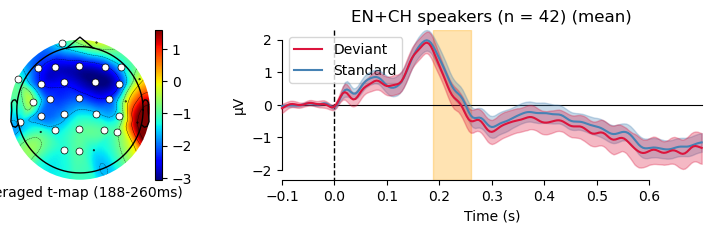

In [12]:
#######################
#### visualization ####
#######################

#### parameter ####
toggle_save_plot = False

# pick_chans = ['Cz']

# title
permutation_wave_title = subj_group + ' (n = ' + str(len(subset_subs)) + ')'

# What legend do you want to give to each type of stimuli? It shows in plots
legend_devi = 'Deviant'
legend_stan = 'Standard'




#### prepare data for waveform plotting ####
stan_data = [stan_dict[k] for k in stan_dict.keys()]
devi_data = [devi_dict[k] for k in devi_dict.keys()]

# organize data for plotting
evokeds = {
    legend_stan: stan_data,
    legend_devi: devi_data,
}


#### prepare data for topo plotting ####

# create a list of grand average differences
erp_diff_list = list(erp_diff.values())

grand_avg_diff = mne.grand_average(erp_diff_list)


## visualize clusters

if len(good_clusters_idx) > 0:
    
    # configure variables for visualization
    colors = {legend_devi: "crimson", legend_stan: "steelblue"}
    # linestyles = {"ChEn_d": "-", "ChEn_s": "--"}

    # loop over clusters
    for i_clu in range(len(good_clusters_idx)):
        # unpack cluster information, get unique indices
        time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[i_clu]])

        # get channel indices
        ch_inds = np.unique(space_inds)
        # convert it to panda dataframe and save as .txt
        df = pd.DataFrame(ch_inds+1)
        df.to_csv('input/stats_channel_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        # get time indices
        time_inds = np.unique(time_inds)
        # convert it to panda dataframe and save as .txt
        df = pd.DataFrame(time_inds+1)
        df.to_csv('input/stats_time_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_time_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        
        # get topography for F stat
        t_map = T_obs[time_inds, ...].mean(axis=0)

        # get signals at the sensors contributing to the cluster
        sig_times = epoch_info.times[time_inds]

        # create spatial mask
        mask = np.zeros((t_map.shape[0], 148), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
        mask[ch_inds, :] = True

        # initialize figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(7, 5), layout="constrained")

        # plot topos of average test statistic and mark significant sensors
        t_evoked = mne.EvokedArray(t_map[:, np.newaxis]/1e6, epoch_info.info, tmin=0)
        t_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            cmap="jet",
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params=dict(markersize=10),
        )
        image = ax_topo.images[0]

        # remove the title that would otherwise say "0.000 s"
        ax_topo.set_title("")

        # create additional axes (for ERF and colorbar)
        divider = make_axes_locatable(ax_topo)

        # add axes for colorbar
        ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(image, cax=ax_colorbar)
        ax_topo.set_xlabel(
            "Averaged t-map ({:}-{:}ms)".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
        )

        # add new axis for time courses and plot time courses
        ax_signals = divider.append_axes("right", size="300%", pad=1.2)

        # plot waveforms
        plot_compare_evokeds(
            evokeds,
            title=permutation_wave_title,
            picks=ch_inds,
            axes=ax_signals,
            colors=colors,
            # linestyles=linestyles,
            show=False,
            split_legend=True,
            truncate_yaxis="auto",
            combine="mean",
        )
        

        # plot temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()
        ax_signals.fill_betweenx(
            (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
        )

        # save
        if toggle_save_plot:
            fig.savefig(output_dir + 'permutation_' + subj_group + '_cluster' + str(i_clu) + '.png')



        # #### plotting topo of voltage ####
        # # figure axes
        # fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        # ax_topo = fig.add_axes([0.9, 0.1, 0.05, 0.7])

        # t_evoked = mne.EvokedArray(t_map[:, np.newaxis], epoch_info.info, tmin=0)
        # t_evoked.plot_topomap(
        #     times=0,
        #     mask=mask,
        #     mask_params=dict(markersize=6 ),
        #     axes=[ax, ax_topo],
        #     # cmap="jet",
        #     vlim=(np.min, np.max),
        #     show=False,
        #     colorbar=True,
        # )
        
        # ax_topo.set_title("Your Title", fontsize=14)
        # ax.set_title('{:}-{:}ms'.format(int(sig_times[0]*1000), int(sig_times[-1]*1000)), fontsize=10)

    
        # save fig
        # if toggle_save_plot:
        #     fig.savefig(output_dir + 'permutation_voltage_topo_' + subj_group + '_' + 'cluster' + str(i_clu) + '.png', bbox_inches='tight')
    
    # plt.show()

## Visualization, waveform + t-map, for poster

Identifying common channels ...
combining channels using "mean"
combining channels using "mean"


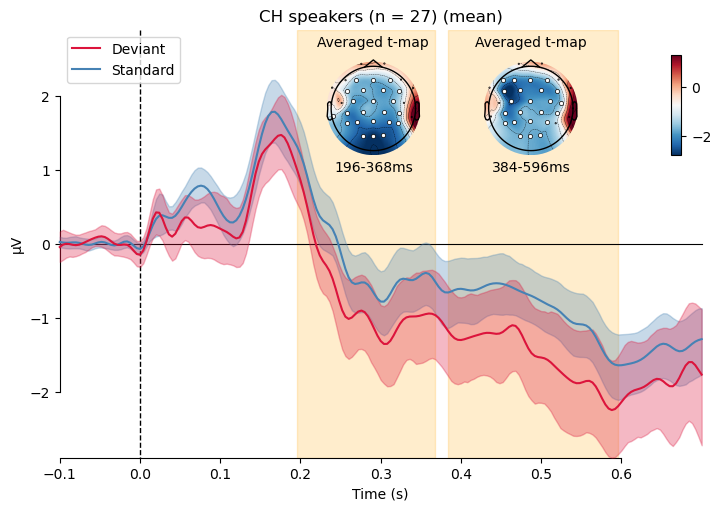

In [89]:
#######################
#### visualization, waveform + t-map, for poster ####
#######################

#### parameter ####
toggle_save_plot = True

# pick_chans = ['Cz']

# title
permutation_wave_title = subj_group + ' (n = ' + str(len(subset_subs)) + ')'

# What legend do you want to give to each type of stimuli? It shows in plots
legend_devi = 'Deviant'
legend_stan = 'Standard'




#### prepare data for waveform plotting ####
stan_data = [stan_dict[k] for k in stan_dict.keys()]
devi_data = [devi_dict[k] for k in devi_dict.keys()]

# organize data for plotting
evokeds = {
    legend_stan: stan_data,
    legend_devi: devi_data,
}


#### prepare data for topo plotting ####

# create a list of grand average differences
erp_diff_list = list(erp_diff.values())

grand_avg_diff = mne.grand_average(erp_diff_list)


## visualize clusters

if len(good_clusters_idx) > 0:
    
    # configure variables for visualization
    colors = {legend_devi: "crimson", legend_stan: "steelblue"}
    # linestyles = {"ChEn_d": "-", "ChEn_s": "--"}

    # loop over clusters
    for i_clu in range(len(good_clusters_idx)):
        # unpack cluster information, get unique indices
        time_inds, space_inds = np.squeeze(clusters[good_clusters_idx[i_clu]])

        # get channel indices
        ch_inds = np.unique(space_inds)
        # convert it to panda dataframe and save as .txt
        # df = pd.DataFrame(ch_inds+1)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_channel_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        # get time indices
        time_inds = np.unique(time_inds)
        # # convert it to panda dataframe and save as .txt
        # df = pd.DataFrame(time_inds+1)
        # # df.to_csv('input/stats_time_index_' + subj_group + '_All_blocks_cluster' + str(i_clu) + '.txt', header=False, index=False)
        # df.to_csv('input/stats_time_index_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '_cluster' + str(i_clu) + '.txt', header=False, index=False)
        
        
        # get topography for F stat
        t_map = T_obs[time_inds, ...].mean(axis=0)/1e6

        # get signals at the sensors contributing to the cluster
        sig_times = epoch_info.times[time_inds]

        # create spatial mask
        mask = np.zeros((t_map.shape[0], 1), dtype=bool) # the number is obtained based on the error message, I don't know how to decide this number.
        mask[ch_inds, :] = True

        # initialize figure
        if i_clu==0:
            fig, ax_wave = plt.subplots(1, 1, figsize=(7, 5), layout="constrained")
            
            # plot waveforms
            plot_compare_evokeds(
                evokeds,
                title=permutation_wave_title,
                picks=ch_inds,
                axes=ax_wave,
                colors=colors,
                # linestyles=linestyles,
                show=False,
                split_legend=True,
                truncate_yaxis="auto",
                combine="mean",
            )
        

            # plot temporal cluster extent
            ymin, ymax = ax_wave.get_ylim()
            ax_wave.fill_betweenx(
                (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.2
            )

        # for the 2nd cluster of CH group
        else:
            ax_wave.fill_betweenx(
                (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.2
            )


        #### plotting topo of tmap ####

        # position for tmap topo
        if subj_group == 'CH speakers':
            if i_clu==0:
                ax_topo = fig.add_axes([0.425, 0.7, 0.2, 0.2]) # topo position for CH speaker cluster 1
                # Position for the colorbar
                cbar_ax = fig.add_axes([0.95, 0.7, 0.015, 0.2])
            else:
                ax_topo = fig.add_axes([0.65, 0.7, 0.2, 0.2])
        else:
            ax_topo = fig.add_axes([0.57, 0.7, 0.2, 0.2]) # topo position for EN speaker
            # Position for the colorbar
            cbar_ax = fig.add_axes([0.95, 0.7, 0.015, 0.2])



        # plot topos of average test statistic and mark significant sensors
        t_evoked = mne.EvokedArray(t_map[:, np.newaxis], epoch_info.info, tmin=0)
        t_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            # cmap="jet",
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params=dict(markersize=6),
        )

        # ax_topo.set_title("Your Title", fontsize=14)
        ax_topo.set_title('Averaged t-map', fontsize=10)

        ax_topo.set_xlabel(
            "{:}-{:}ms".format(int(sig_times[0]*1000), int(sig_times[-1]*1000))
        )
        
        # add colorbar
        if i_clu == 0:
            image = ax_topo.images[0]
            plt.colorbar(image, cax=cbar_ax)
            cbar_ax.tick_params(labelsize=10)
            cbar_ax.yaxis.get_offset_text().set_fontsize(10)

    

        
        # save fig
        if toggle_save_plot:
            fig.savefig(output_dir + 'permutation_waveform+t-map_' + subj_group + '_' + devi_key + '_minus_' + stan_key + '.png', bbox_inches='tight')
    
    